# **New York City Yellow Taxi Data**

## Objective
In this case study you will be learning exploratory data analysis (EDA) with the help of a dataset on yellow taxi rides in New York City. This will enable you to understand why EDA is an important step in the process of data science and machine learning.

## **Problem Statement**
As an analyst at an upcoming taxi operation in NYC, you are tasked to use the 2023 taxi trip data to uncover insights that could help optimise taxi operations. The goal is to analyse patterns in the data that can inform strategic decisions to improve service efficiency, maximise revenue, and enhance passenger experience.

## Tasks
You need to perform the following steps for successfully completing this assignment:
1. Data Loading
2. Data Cleaning
3. Exploratory Analysis: Bivariate and Multivariate
4. Creating Visualisations to Support the Analysis
5. Deriving Insights and Stating Conclusions

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Understanding
The yellow taxi trip records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts.

The data is stored in Parquet format (*.parquet*). The dataset is from 2009 to 2024. However, for this assignment, we will only be using the data from 2023.

The data for each month is present in a different parquet file. You will get twelve files for each of the months in 2023.

The data was collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers like vendors and taxi hailing apps. <br>

You can find the link to the TLC trip records page here: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

###  Data Description
You can find the data description here: [Data Dictionary](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)

**Trip Records**



|Field Name       |description |
|:----------------|:-----------|
| VendorID | A code indicating the TPEP provider that provided the record. <br> 1= Creative Mobile Technologies, LLC; <br> 2= VeriFone Inc. |
| tpep_pickup_datetime | The date and time when the meter was engaged.  |
| tpep_dropoff_datetime | The date and time when the meter was disengaged.   |
| Passenger_count | The number of passengers in the vehicle. <br> This is a driver-entered value. |
| Trip_distance | The elapsed trip distance in miles reported by the taximeter. |
| PULocationID | TLC Taxi Zone in which the taximeter was engaged |
| DOLocationID | TLC Taxi Zone in which the taximeter was disengaged |
|RateCodeID |The final rate code in effect at the end of the trip.<br> 1 = Standard rate <br> 2 = JFK <br> 3 = Newark <br>4 = Nassau or Westchester <br>5 = Negotiated fare <br>6 = Group ride |
|Store_and_fwd_flag |This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.  <br>Y= store and forward trip <br>N= not a store and forward trip |
|Payment_type| A numeric code signifying how the passenger paid for the trip. <br> 1 = Credit card <br>2 = Cash <br>3 = No charge <br>4 = Dispute <br>5 = Unknown <br>6 = Voided trip |
|Fare_amount| The time-and-distance fare calculated by the meter. <br>Extra Miscellaneous extras and surcharges.  Currently, this only includes the 0.50 and 1 USD rush hour and overnight charges. |
|MTA_tax |0.50 USD MTA tax that is automatically triggered based on the metered rate in use. |
|Improvement_surcharge | 0.30 USD improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015. |
|Tip_amount |Tip amount – This field is automatically populated for credit card tips. Cash tips are not included. |
| Tolls_amount | Total amount of all tolls paid in trip.  |
| total_amount | The total amount charged to passengers. Does not include cash tips. |
|Congestion_Surcharge |Total amount collected in trip for NYS congestion surcharge. |
| Airport_fee | 1.25 USD for pick up only at LaGuardia and John F. Kennedy Airports|

Although the amounts of extra charges and taxes applied are specified in the data dictionary, you will see that some cases have different values of these charges in the actual data.

**Taxi Zones**

Each of the trip records contains a field corresponding to the location of the pickup or drop-off of the trip, populated by numbers ranging from 1-263.

These numbers correspond to taxi zones, which may be downloaded as a table or map/shapefile and matched to the trip records using a join.

This is covered in more detail in later sections.

---

## **1** Data Preparation

<font color = red>[5 marks]</font> <br>

### Import Libraries

In [75]:
# Import warnings
import warnings
warnings.filterwarnings("ignore")

In [76]:
# Import the libraries you will be using for analysis
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns


In [77]:
# Recommended versions
# numpy version: 1.26.4
# pandas version: 2.2.2
# matplotlib version: 3.10.0
# seaborn version: 0.13.2

# Check versions
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib version:", plt.matplotlib.__version__)
print("seaborn version:", sns.__version__)

numpy version: 2.2.3
pandas version: 2.2.2
matplotlib version: 3.10.0
seaborn version: 0.13.2


### **1.1** Load the dataset
<font color = red>[5 marks]</font> <br>

You will see twelve files, one for each month.

To read parquet files with Pandas, you have to follow a similar syntax as that for CSV files.

`df = pd.read_parquet('file.parquet')`

In [78]:
import os
os.chdir(r'D:\Upgrad\Upgrad_DS\DSC75\EDA\Datasets and Dictionary-NYC\Datasets and Dictionary\trip_records')

In [79]:
# Try loading one file

df = pd.read_parquet('2023-1.parquet')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3041714 entries, 0 to 3066765
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee            floa

How many rows are there? Do you think handling such a large number of rows is computationally feasible when we have to combine the data for all twelve months into one?

To handle this, we need to sample a fraction of data from each of the files. How to go about that? Think of a way to select only some portion of the data from each month's file that accurately represents the trends.

#### Sampling the Data
> One way is to take a small percentage of entries for pickup in every hour of a date. So, for all the days in a month, we can iterate through the hours and select 5% values randomly from those. Use `tpep_pickup_datetime` for this. Separate date and hour from the datetime values and then for each date, select some fraction of trips for each of the 24 hours.

To sample data, you can use the `sample()` method. Follow this syntax:

```Python
# sampled_data is an empty DF to keep appending sampled data of each hour
# hour_data is the DF of entries for an hour 'X' on a date 'Y'

sample = hour_data.sample(frac = 0.05, random_state = 42)
# sample 0.05 of the hour_data
# random_state is just a seed for sampling, you can define it yourself

sampled_data = pd.concat([sampled_data, sample]) # adding data for this hour to the DF
```

This *sampled_data* will contain 5% values selected at random from each hour.

Note that the code given above is only the part that will be used for sampling and not the complete code required for sampling and combining the data files.

Keep in mind that you sample by date AND hour, not just hour. (Why?)

---

**1.1.1** <font color = red>[5 marks]</font> <br>
Figure out how to sample and combine the files.

**Note:** It is not mandatory to use the method specified above. While sampling, you only need to make sure that your sampled data represents the overall data of all the months accurately.

In [80]:
# Sample the data
# It is recommmended to not load all the files at once to avoid memory overload

In [81]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
'''
# Take a small percentage of entries from each hour of every date.
# Iterating through the monthly data:
#   read a month file -> day -> hour: append sampled data -> move to next hour -> move to next day after 24 hours -> move to next month file
# Create a single dataframe for the year combining all the monthly data

# Select the folder having data files
import os

# Select the folder having data files
os.chdir('/content/Assignments/EDA/data_NYC_Taxi/trip_records')

# Create a list of all the twelve files to read
file_list = os.listdir()

# initialise an empty dataframe
df = pd.DataFrame()


# iterate through the list of files and sample one by one:
for file_name in file_list:
    try:
        # file path for the current file
        file_path = os.path.join(os.getcwd(), file_name)

        # Reading the current file



        # We will store the sampled data for the current date in this df by appending the sampled data from each hour to this
        # After completing iteration through each date, we will append this data to the final dataframe.
        sampled_data = pd.DataFrame()

        # Loop through dates and then loop through every hour of each date

            # Iterate through each hour of the selected date

                # Sample 5% of the hourly data randomly

                # add data of this hour to the dataframe

        # Concatenate the sampled data of all the dates to a single dataframe
        df = # we initialised this empty DF earlier

    except Exception as e:
        print(f"Error reading file {file_name}: {e}")

'''


In [83]:
import os
import pandas as pd
from datetime import datetime

# Create a list of all the twelve files to read
file_list = os.listdir()

# Initialize an empty dataframe
df = pd.DataFrame()

# Iterate through the list of files and sample one by one:
for file_name in file_list:
    try:
        # File path for the current file
        file_path = os.path.join(os.getcwd(), file_name)

        # Reading the current file
        monthly_data = pd.read_parquet(file_path)  # Assuming the files are in parquet format

        # Convert the pickup datetime to a datetime object if it's not already
        monthly_data['tpep_pickup_datetime'] = pd.to_datetime(monthly_data['tpep_pickup_datetime'])

        # We will store the sampled data for the current month in this df by appending the sampled data from each hour to this
        sampled_data = pd.DataFrame()

        # Loop through dates and then loop through every hour of each date
        for date, day_data in monthly_data.groupby(monthly_data['tpep_pickup_datetime'].dt.date):
            for hour, hour_data in day_data.groupby(day_data['tpep_pickup_datetime'].dt.hour):
                # Sample 5% of the hourly data randomly
                sampled_hour_data = hour_data.sample(frac=0.008, random_state=42)

                # Add data of this hour to the dataframe
                sampled_data = pd.concat([sampled_data, sampled_hour_data])

        # Concatenate the sampled data of all the dates to a single dataframe
        df = pd.concat([df, sampled_data])

    except Exception as e:
        print(f"Error reading file {file_name}: {e}")

# Save the final dataframe to a file if needed
df.to_parquet('sampled_NYC_Taxi_data.parquet', index=False)

print("Sampling completed and data saved to 'sampled_NYC_Taxi_data.parquet'")

Sampling completed and data saved to 'sampled_NYC_Taxi_data.parquet'


After combining the data files into one DataFrame, convert the new DataFrame to a CSV or parquet file and store it to use directly.

Ideally, you can try keeping the total entries to around 250,000 to 300,000.

## **2** Data Cleaning
<font color = red>[30 marks]</font> <br>

Now we can load the new data directly.

In [88]:
# Load the new data file

df = pd.read_parquet('sampled_NYC_Taxi_data.parquet')

In [89]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,Airport_fee
0,2,2023-01-01 00:07:18,2023-01-01 00:23:15,1.0,7.74,1.0,N,138,256,2,32.40,6.0,0.5,0.00,0.0,1.0,41.15,0.0,1.25,NaN
1,2,2023-01-01 00:16:41,2023-01-01 00:21:46,2.0,1.24,1.0,N,161,237,1,7.90,1.0,0.5,2.58,0.0,1.0,15.48,2.5,0.00,NaN
2,2,2023-01-01 00:14:03,2023-01-01 00:24:36,3.0,1.44,1.0,N,237,141,2,11.40,1.0,0.5,0.00,0.0,1.0,16.40,2.5,0.00,NaN
3,2,2023-01-01 00:24:30,2023-01-01 00:29:55,1.0,0.54,1.0,N,143,142,2,6.50,1.0,0.5,0.00,0.0,1.0,11.50,2.5,0.00,NaN
4,2,2023-01-01 00:43:00,2023-01-01 01:01:00,NaN,19.24,NaN,None,66,107,0,25.64,0.0,0.5,5.93,0.0,1.0,35.57,NaN,NaN,NaN


In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303397 entries, 0 to 303396
Data columns (total 20 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               303397 non-null  int64         
 1   tpep_pickup_datetime   303397 non-null  datetime64[us]
 2   tpep_dropoff_datetime  303397 non-null  datetime64[us]
 3   passenger_count        293215 non-null  float64       
 4   trip_distance          303397 non-null  float64       
 5   RatecodeID             293215 non-null  float64       
 6   store_and_fwd_flag     293215 non-null  object        
 7   PULocationID           303397 non-null  int64         
 8   DOLocationID           303397 non-null  int64         
 9   payment_type           303397 non-null  int64         
 10  fare_amount            303397 non-null  float64       
 11  extra                  303397 non-null  float64       
 12  mta_tax                303397 non-null  floa

#### **2.1** Fixing Columns
<font color = red>[10 marks]</font> <br>

Fix/drop any columns as you seem necessary in the below sections

**2.1.1** <font color = red>[2 marks]</font> <br>

Fix the index and drop unnecessary columns

In [92]:
# Fix the index and drop any columns that are not needed
# List of columns to drop
columns_to_drop = ['store_and_fwd_flag']

# Drop the columns
df = df.drop(columns=columns_to_drop)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303397 entries, 0 to 303396
Data columns (total 19 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               303397 non-null  int64         
 1   tpep_pickup_datetime   303397 non-null  datetime64[us]
 2   tpep_dropoff_datetime  303397 non-null  datetime64[us]
 3   passenger_count        293215 non-null  float64       
 4   trip_distance          303397 non-null  float64       
 5   RatecodeID             293215 non-null  float64       
 6   PULocationID           303397 non-null  int64         
 7   DOLocationID           303397 non-null  int64         
 8   payment_type           303397 non-null  int64         
 9   fare_amount            303397 non-null  float64       
 10  extra                  303397 non-null  float64       
 11  mta_tax                303397 non-null  float64       
 12  tip_amount             303397 non-null  floa

In [93]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,Airport_fee
0,2,2023-01-01 00:07:18,2023-01-01 00:23:15,1.0,7.74,1.0,138,256,2,32.40,6.0,0.5,0.00,0.0,1.0,41.15,0.0,1.25,NaN
1,2,2023-01-01 00:16:41,2023-01-01 00:21:46,2.0,1.24,1.0,161,237,1,7.90,1.0,0.5,2.58,0.0,1.0,15.48,2.5,0.00,NaN
2,2,2023-01-01 00:14:03,2023-01-01 00:24:36,3.0,1.44,1.0,237,141,2,11.40,1.0,0.5,0.00,0.0,1.0,16.40,2.5,0.00,NaN
3,2,2023-01-01 00:24:30,2023-01-01 00:29:55,1.0,0.54,1.0,143,142,2,6.50,1.0,0.5,0.00,0.0,1.0,11.50,2.5,0.00,NaN
4,2,2023-01-01 00:43:00,2023-01-01 01:01:00,NaN,19.24,NaN,66,107,0,25.64,0.0,0.5,5.93,0.0,1.0,35.57,NaN,NaN,NaN


**2.1.2** <font color = red>[3 marks]</font> <br>
There are two airport fee columns. This is possibly an error in naming columns. Let's see whether these can be combined into a single column.

In [94]:
# Combine the two airport fee columns
def merge_columns_manual(df, col1, col2, new_col_name):
    """
    Merges two columns into a single column, prioritizing non-NaN values from col1.

    Parameters:
        df (pd.DataFrame): The DataFrame containing the columns.
        col1 (str): The name of the first column.
        col2 (str): The name of the second column.
        new_col_name (str): The name of the new merged column.

    Returns:
        pd.DataFrame: The DataFrame with the merged column.
    """
    # Create the new merged column
    df[new_col_name] = np.where(
        df[col1].isna(),  # Condition: Check if col1 has NaN
        df[col2],         # If col1 has NaN, use col2
        df[col1]          # Otherwise, use col1
    )

    # Drop the original columns
    df = df.drop(columns=[col1, col2])

    return df


df = merge_columns_manual(df, col1='airport_fee', col2='Airport_fee', new_col_name='airport_fee_merged')

**2.1.3** <font color = red>[5 marks]</font> <br>
Fix columns with negative (monetary) values

In [95]:
# check where values of fare amount are negative
# Find which columns have negative values

# Initialize a dictionary to store the count of negative values for each column
negative_counts = {}

# Loop through each column in the DataFrame
for column in df.columns:
    # Check if the column is numeric (to avoid errors with non-numeric columns)
    if pd.api.types.is_numeric_dtype(df[column]):
        # Count the number of negative values in the column
        negative_count = (df[column] < 0).sum()
        if negative_count > 0:
            negative_counts[column] = negative_count

# Print the results
if negative_counts:
    print("Columns with negative values and their counts:")
    for column, count in negative_counts.items():
        print(f"{column}: {count} negative rows")
else:
    print("No columns have negative values.")

# Analyze negative values by RateCodeID
for column in negative_counts:
    print(f"\nNegative values in {column} by RateCodeID:")
    print(df[df[column] < 0].groupby('RatecodeID').size())


Columns with negative values and their counts:
extra: 1 negative rows
mta_tax: 11 negative rows
improvement_surcharge: 11 negative rows
total_amount: 11 negative rows
congestion_surcharge: 6 negative rows
airport_fee_merged: 2 negative rows

Negative values in extra by RateCodeID:
RatecodeID
1.0    1
dtype: int64

Negative values in mta_tax by RateCodeID:
RatecodeID
1.0    6
2.0    5
dtype: int64

Negative values in improvement_surcharge by RateCodeID:
RatecodeID
1.0    6
2.0    5
dtype: int64

Negative values in total_amount by RateCodeID:
RatecodeID
1.0    6
2.0    5
dtype: int64

Negative values in congestion_surcharge by RateCodeID:
RatecodeID
1.0    2
2.0    4
dtype: int64

Negative values in airport_fee_merged by RateCodeID:
RatecodeID
1.0    1
2.0    1
dtype: int64


In [96]:
df.isnull().sum()

VendorID                     0
tpep_pickup_datetime         0
tpep_dropoff_datetime        0
passenger_count          10182
trip_distance                0
RatecodeID               10182
PULocationID                 0
DOLocationID                 0
payment_type                 0
fare_amount                  0
extra                        0
mta_tax                      0
tip_amount                   0
tolls_amount                 0
improvement_surcharge        0
total_amount                 0
congestion_surcharge     10182
airport_fee_merged       10182
dtype: int64

Did you notice something different in the `RatecodeID` column for above records?

In [ ]:
# Rate Code ID for the -ve entries are either 1 or 2 which are defined values, nothing unusual observed

In [ ]:
# Analyse RatecodeID for the negative fare amounts



,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee_merged
4,2,2023-01-01 00:43:00,2023-01-01 01:01:00,NaN,19.24,NaN,66,107,0,25.64,0.0,0.5,5.93,0.00,1.0,35.57,NaN,NaN
15,2,2023-01-01 00:41:50,2023-01-01 01:14:50,NaN,10.77,NaN,151,106,0,45.38,0.0,0.5,11.19,6.55,1.0,67.12,NaN,NaN
45,2,2023-01-01 01:46:00,2023-01-01 02:15:00,NaN,4.97,NaN,50,226,0,27.62,0.0,0.5,6.32,0.00,1.0,37.94,NaN,NaN
46,2,2023-01-01 01:10:00,2023-01-01 01:41:00,NaN,5.73,NaN,186,255,0,27.32,0.0,0.5,6.26,0.00,1.0,37.58,NaN,NaN
61,2,2023-01-01 01:18:30,2023-01-01 01:46:19,NaN,2.98,NaN,137,48,0,27.54,0.0,0.5,3.15,0.00,1.0,34.69,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
303238,1,2023-09-30 21:50:20,2023-09-30 22:06:38,NaN,0.00,NaN,249,87,0,19.71,0.0,0.5,0.00,0.00,1.0,23.71,NaN,NaN
303303,1,2023-09-30 22:53:15,2023-09-30 23:10:04,NaN,0.00,NaN,48,249,0,21.88,0.0,0.5,0.00,0.00,1.0,25.88,NaN,NaN
303349,2,2023-09-30 23:27:39,2023-09-30 23:43:22,NaN,3.01,NaN,163,262,0,22.25,0.0,0.5,5.25,0.00,1.0,31.50,NaN,NaN
303368,1,2023-09-30 23:12:36,2023-09-30 23:36:35,NaN,0.00,NaN,161,87,0,31.01,0.0,0.5,0.00,0.00,1.0,35.01,NaN,NaN


In [97]:
# fix these negative values

negative_counts

{'extra': np.int64(1),
 'mta_tax': np.int64(11),
 'improvement_surcharge': np.int64(11),
 'total_amount': np.int64(11),
 'congestion_surcharge': np.int64(6),
 'airport_fee_merged': np.int64(2)}

In [98]:
columns_to_check = [
    'extra', 
    'mta_tax', 
    'tolls_amount', 
    'improvement_surcharge', 
    'total_amount', 
    'congestion_surcharge', 
    'airport_fee_merged'
]

# Remove rows with negative values in any of the specified columns
df = df[~((df[columns_to_check] < 0).any(axis=1))]

In [99]:
# Check for remaining negative values
for column in columns_to_check:
    if (df[column] < 0).any():
        print(f"Negative values still exist in column: {column}")
    else:
        print(f"No negative values in column: {column}")

No negative values in column: extra
No negative values in column: mta_tax
No negative values in column: tolls_amount
No negative values in column: improvement_surcharge
No negative values in column: total_amount
No negative values in column: congestion_surcharge
No negative values in column: airport_fee_merged


### **2.2** Handling Missing Values
<font color = red>[10 marks]</font> <br>

**2.2.1**  <font color = red>[2 marks]</font> <br>
Find the proportion of missing values in each column




In [100]:
# Find the proportion of missing values in each column

# Calculate the proportion of missing values in each column
missing_proportions = df.isna().mean()

# Print the results
print("Proportion of missing values in each column:")
print(missing_proportions)

Proportion of missing values in each column:
VendorID                 0.000000
tpep_pickup_datetime     0.000000
tpep_dropoff_datetime    0.000000
passenger_count          0.033561
trip_distance            0.000000
RatecodeID               0.033561
PULocationID             0.000000
DOLocationID             0.000000
payment_type             0.000000
fare_amount              0.000000
extra                    0.000000
mta_tax                  0.000000
tip_amount               0.000000
tolls_amount             0.000000
improvement_surcharge    0.000000
total_amount             0.000000
congestion_surcharge     0.033561
airport_fee_merged       0.033561
dtype: float64


**2.2.2**  <font color = red>[3 marks]</font> <br>
Handling missing values in `passenger_count`

In [101]:
# Display the rows with null values
df[df.passenger_count.isna()]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee_merged
4,2,2023-01-01 00:43:00,2023-01-01 01:01:00,NaN,19.24,NaN,66,107,0,25.64,0.0,0.5,5.93,0.00,1.0,35.57,NaN,NaN
15,2,2023-01-01 00:41:50,2023-01-01 01:14:50,NaN,10.77,NaN,151,106,0,45.38,0.0,0.5,11.19,6.55,1.0,67.12,NaN,NaN
45,2,2023-01-01 01:46:00,2023-01-01 02:15:00,NaN,4.97,NaN,50,226,0,27.62,0.0,0.5,6.32,0.00,1.0,37.94,NaN,NaN
46,2,2023-01-01 01:10:00,2023-01-01 01:41:00,NaN,5.73,NaN,186,255,0,27.32,0.0,0.5,6.26,0.00,1.0,37.58,NaN,NaN
61,2,2023-01-01 01:18:30,2023-01-01 01:46:19,NaN,2.98,NaN,137,48,0,27.54,0.0,0.5,3.15,0.00,1.0,34.69,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
303238,1,2023-09-30 21:50:20,2023-09-30 22:06:38,NaN,0.00,NaN,249,87,0,19.71,0.0,0.5,0.00,0.00,1.0,23.71,NaN,NaN
303303,1,2023-09-30 22:53:15,2023-09-30 23:10:04,NaN,0.00,NaN,48,249,0,21.88,0.0,0.5,0.00,0.00,1.0,25.88,NaN,NaN
303349,2,2023-09-30 23:27:39,2023-09-30 23:43:22,NaN,3.01,NaN,163,262,0,22.25,0.0,0.5,5.25,0.00,1.0,31.50,NaN,NaN
303368,1,2023-09-30 23:12:36,2023-09-30 23:36:35,NaN,0.00,NaN,161,87,0,31.01,0.0,0.5,0.00,0.00,1.0,35.01,NaN,NaN


In [102]:
# Impute NaN values in 'passenger_count'
median_value = df['passenger_count'].median()
df['passenger_count'] = df['passenger_count'].fillna(median_value)

In [103]:
df.passenger_count.value_counts()

passenger_count
1.0    231225
2.0     44093
3.0     11004
4.0      6066
0.0      4654
5.0      3771
6.0      2567
8.0         2
7.0         2
9.0         1
Name: count, dtype: int64

In [104]:
# Replace 0 values with 1
df['passenger_count'] = df['passenger_count'].replace(0, 1)

In [105]:
df.passenger_count.value_counts()

passenger_count
1.0    235879
2.0     44093
3.0     11004
4.0      6066
5.0      3771
6.0      2567
8.0         2
7.0         2
9.0         1
Name: count, dtype: int64

Did you find zeroes in passenger_count? Handle these.


**2.2.3**  <font color = red>[2 marks]</font> <br>
Handle missing values in `RatecodeID`

In [106]:
# Fix missing values in 'RatecodeID'

median_value_rate = df['RatecodeID'].median()
df['RatecodeID'] = df['RatecodeID'].fillna(median_value_rate)

df.RatecodeID.value_counts()

RatecodeID
1.0     287009
2.0      11458
99.0      1727
5.0       1650
3.0        961
4.0        580
Name: count, dtype: int64

**2.2.4**  <font color = red>[3 marks]</font> <br>
Impute NaN in `congestion_surcharge`

In [107]:
df.congestion_surcharge.value_counts()

congestion_surcharge
2.5    270773
0.0     22430
Name: count, dtype: int64

In [108]:
df.congestion_surcharge.median()

np.float64(2.5)

In [109]:
# Handle any remaining missing values

df['congestion_surcharge'] = df['congestion_surcharge'].fillna(0)

In [110]:
df['congestion_surcharge'].value_counts()

congestion_surcharge
2.5    270773
0.0     32612
Name: count, dtype: int64

### **2.3** Handling Outliers
<font color = red>[10 marks]</font> <br>

Before we start fixing outliers, let's perform outlier analysis.

In [111]:
df.RatecodeID.value_counts()

RatecodeID
1.0     287009
2.0      11458
99.0      1727
5.0       1650
3.0        961
4.0        580
Name: count, dtype: int64

RatecodeID has an outlier as 99 is an invalide value

Replacing this vaue with mode

In [112]:
df['RatecodeID'] = df['RatecodeID'].replace(99, float(df.RatecodeID.mode()))
df.RatecodeID.value_counts()

RatecodeID
1.0    288736
2.0     11458
5.0      1650
3.0       961
4.0       580
Name: count, dtype: int64

ValueError: num must be an integer with 1 <= num <= 9, not 10

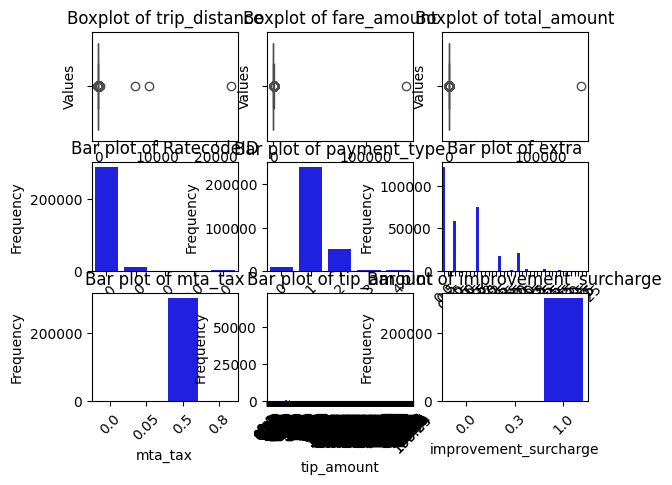

In [113]:
# Describe the data and check if there are any potential outliers present
# Check for potential out of place values in various columns

# List of numeric columns for box plots
numeric_columns = ['trip_distance', 'fare_amount', 'total_amount']

# List of categorical columns for bar plots
categorical_columns = ['RatecodeID', 'payment_type', 'extra', 'mta_tax', 'tip_amount', 'improvement_surcharge', 'congestion_surcharge', 'airport_fee_merged']

# Plot box plots for numeric columns
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(3, 3, i)  # Adjust the grid size (3x3) based on the number of numeric columns
    sns.boxplot(x=df[column], color='blue')
    plt.title(f"Boxplot of {column}")
    plt.xlabel(column)
    plt.ylabel('Values')

# Plot bar plots for categorical columns
for i, column in enumerate(categorical_columns, len(numeric_columns) + 1):
    plt.subplot(3, 3, i)  # Adjust the grid size (3x3) based on the number of categorical columns
    sns.countplot(x=df[column], color='blue')
    plt.title(f"Bar plot of {column}")
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Adjust layout and display the plots
plt.tight_layout()
plt.show()


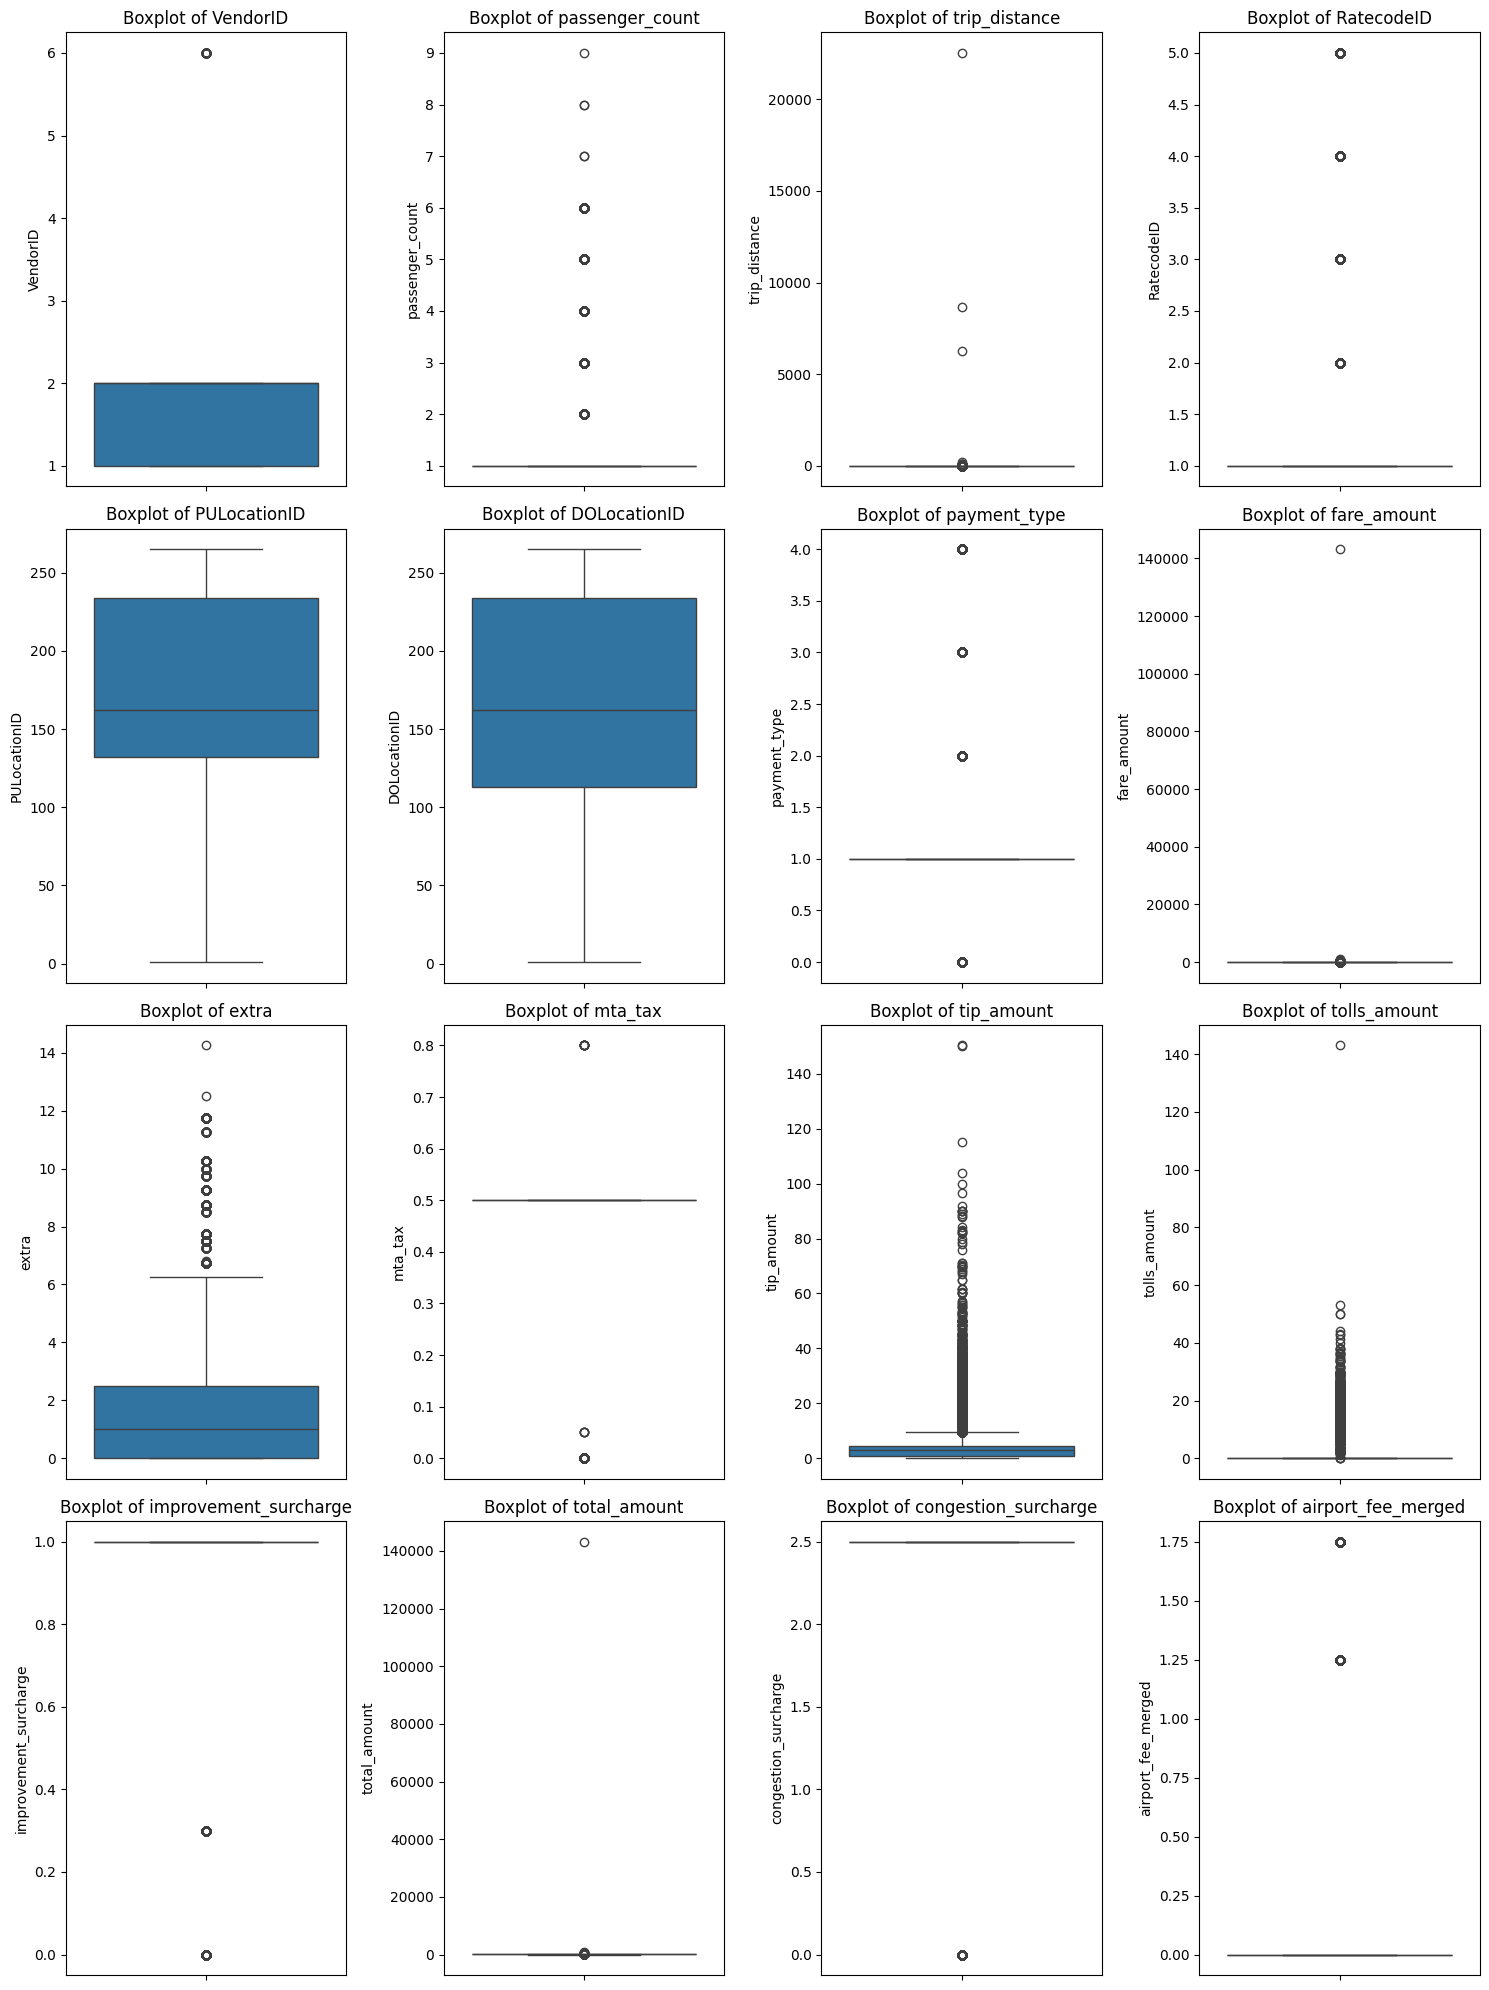

In [ ]:
# Select numeric columns for boxplots
numeric_columns = df.select_dtypes(include=['int', 'float']).columns

# Calculate the number of rows and columns for subplots
num_columns = len(numeric_columns)
num_rows = (num_columns // 4) + (1 if num_columns % 4 != 0 else 0)  # Adjust rows based on number of columns

# Plot boxplots for numeric columns
plt.figure(figsize=(15, 5 * num_rows))  # Adjust figure size based on number of rows
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(num_rows, 4, i)  # Dynamically adjust subplot layout
    sns.boxplot(y=df[column])
    plt.title(f"Boxplot of {column}")
plt.tight_layout()
plt.show()

In [ ]:
df.VendorID.value_counts()

VendorID
2    222234
1     81077
6        74
Name: count, dtype: int64

In [114]:
df.passenger_count.value_counts()

passenger_count
1.0    235879
2.0     44093
3.0     11004
4.0      6066
5.0      3771
6.0      2567
8.0         2
7.0         2
9.0         1
Name: count, dtype: int64

In [115]:
df[df.trip_distance==0]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee_merged
57,2,2023-01-01 01:34:06,2023-01-01 01:34:14,2.0,0.0,5.0,265,265,1,50.00,0.0,0.0,10.20,0.0,1.0,61.20,0.0,0.0
76,1,2023-01-01 01:25:41,2023-01-01 01:25:45,1.0,0.0,1.0,148,148,1,3.00,3.5,0.5,52.00,0.0,1.0,60.00,2.5,0.0
82,1,2023-01-01 01:26:38,2023-01-01 01:27:12,1.0,0.0,5.0,229,229,1,5.00,0.0,0.0,0.00,0.0,1.0,6.00,0.0,0.0
83,2,2023-01-01 01:20:00,2023-01-01 01:20:02,4.0,0.0,5.0,264,264,1,45.00,0.0,0.0,0.80,0.0,1.0,46.80,0.0,0.0
132,2,2023-01-01 03:18:36,2023-01-01 03:18:42,1.0,0.0,1.0,113,113,2,3.00,1.0,0.5,0.00,0.0,1.0,8.00,2.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
303303,1,2023-09-30 22:53:15,2023-09-30 23:10:04,1.0,0.0,1.0,48,249,0,21.88,0.0,0.5,0.00,0.0,1.0,25.88,0.0,NaN
303322,1,2023-09-30 22:25:15,2023-09-30 22:25:19,1.0,0.0,1.0,152,152,1,34.50,0.0,0.5,0.00,0.0,1.0,36.00,0.0,0.0
303353,2,2023-09-30 23:34:29,2023-09-30 23:49:06,1.0,0.0,1.0,264,264,1,12.80,1.0,0.5,4.59,0.0,1.0,19.89,0.0,0.0
303368,1,2023-09-30 23:12:36,2023-09-30 23:36:35,1.0,0.0,1.0,161,87,0,31.01,0.0,0.5,0.00,0.0,1.0,35.01,0.0,NaN


In [116]:
zero_distance_trips = df[df['trip_distance'] == 0]
print(f"Number of trips with trip_distance = 0: {len(zero_distance_trips)}")

Number of trips with trip_distance = 0: 5997


In [117]:
print("Summary of total_amount for trips with trip_distance = 0:")
print(zero_distance_trips['total_amount'].describe())

Summary of total_amount for trips with trip_distance = 0:
count    5997.000000
mean       32.696823
std        37.419608
min         0.000000
25%        13.120000
50%        21.690000
75%        36.230000
max       911.000000
Name: total_amount, dtype: float64


In [118]:
print("Number of trips with different PULocationID and DOLocationID:")
print((zero_distance_trips['PULocationID'] != zero_distance_trips['DOLocationID']).sum())

Number of trips with different PULocationID and DOLocationID:
3483


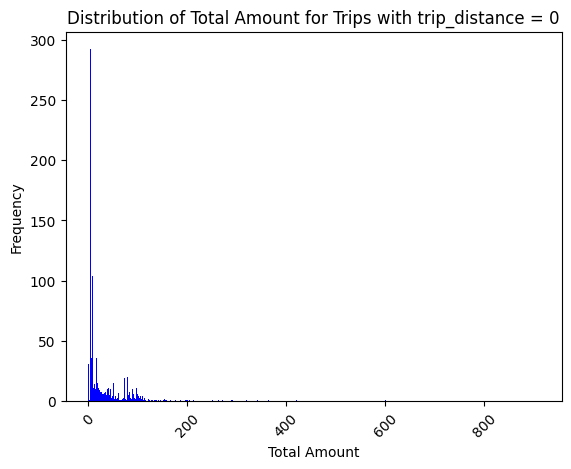

In [119]:
value_counts = zero_distance_trips['total_amount'].value_counts()

# Plot the bar chart
plt.bar(value_counts.index, value_counts.values, color='blue')
plt.xlabel('Total Amount')
plt.ylabel('Frequency')
plt.title('Distribution of Total Amount for Trips with trip_distance = 0')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

In [120]:
df[(df.trip_distance==0) & (zero_distance_trips['PULocationID'] != zero_distance_trips['DOLocationID'])].total_amount.describe()

count    3483.000000
mean       27.619397
std        19.236834
min         0.000000
25%        16.735000
50%        22.800000
75%        32.000000
max       364.200000
Name: total_amount, dtype: float64

**2.3.1**  <font color = red>[10 marks]</font> <br>
Based on the above analysis, it seems that some of the outliers are present due to errors in registering the trips. Fix the outliers.

Some points you can look for:
- Entries where `trip_distance` is nearly 0 and `fare_amount` is more than 300
- Entries where `trip_distance` and `fare_amount` are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
- Entries where `trip_distance` is more than 250  miles.
- Entries where `payment_type` is 0 (there is no payment_type 0 defined in the data dictionary)

These are just some suggestions. You can handle outliers in any way you wish, using the insights from above outlier analysis.

How will you fix each of these values? Which ones will you drop and which ones will you replace?

First, let us remove 7+ passenger counts as there are very less instances.

In [121]:
# remove passenger_count > 6

# Step 0: Remove entries where passenger_count > 6
df = df[df['passenger_count'] <= 6]

In [122]:
# Continue with outlier handling

# Step 1: Remove entries where trip_distance is nearly 0 and fare_amount is more than 300
df = df[~((df['trip_distance'] < 0.1) & (df['fare_amount'] > 300))]

# Step 2: Remove entries where trip_distance and fare_amount are 0 but PULocationID and DOLocationID are different
df = df[~((df['trip_distance'] == 0) & (df['PULocationID'] != df['DOLocationID']))]
        
df = df[~((df['trip_distance'] == 0) & (df['fare_amount'] == 0))]
        
        

# Step 3: Remove entries where trip_distance is more than 250 miles
df = df[df['trip_distance'] <= 250]

# Step 4: Remove entries where payment_type is 0
df = df[df['payment_type'] != 0]


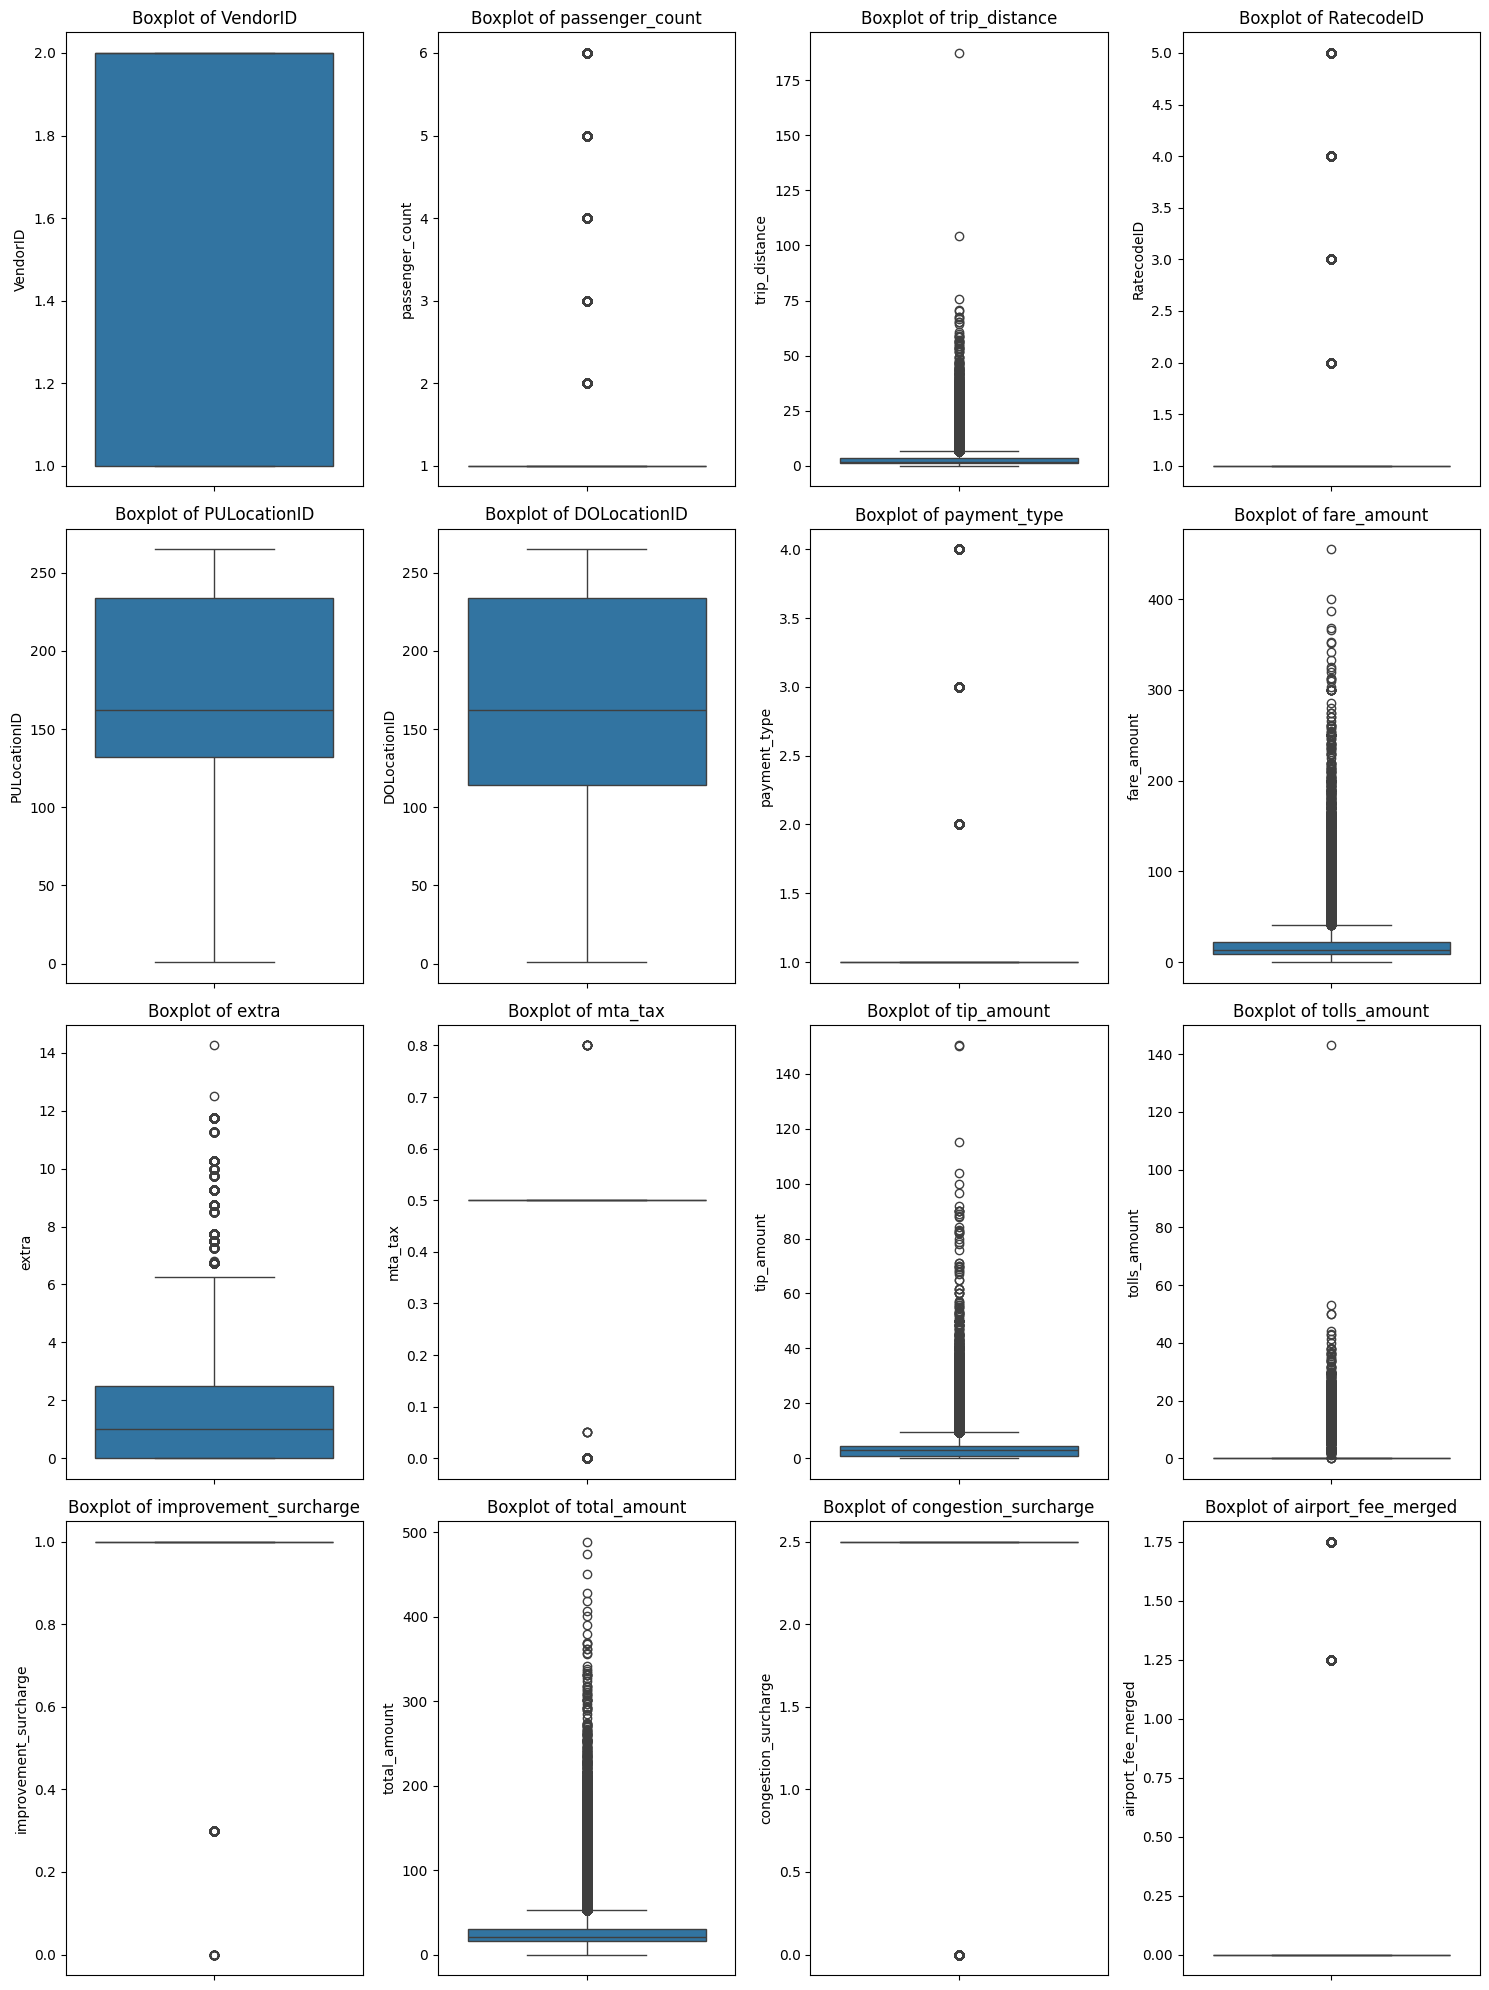

In [ ]:
# Do any columns need standardising?

# Select numeric columns for boxplots
numeric_columns = df.select_dtypes(include=['int', 'float']).columns

# Calculate the number of rows and columns for subplots
num_columns = len(numeric_columns)
num_rows = (num_columns // 4) + (1 if num_columns % 4 != 0 else 0)  # Adjust rows based on number of columns

# Plot boxplots for numeric columns
plt.figure(figsize=(15, 5 * num_rows))  # Adjust figure size based on number of rows
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(num_rows, 4, i)  # Dynamically adjust subplot layout
    sns.boxplot(y=df[column])
    plt.title(f"Boxplot of {column}")
plt.tight_layout()
plt.show()

In [124]:
df = df[~(df.fare_amount>1000)]

In [125]:
df.fare_amount.describe()

count    291946.000000
mean         19.686167
std          18.083058
min           0.000000
25%           9.300000
50%          13.500000
75%          21.900000
max         455.200000
Name: fare_amount, dtype: float64

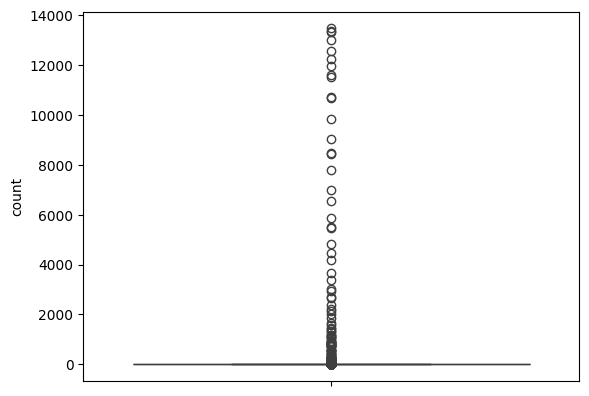

In [57]:
sns.boxplot(data=df.fare_amount.value_counts())
plt.show()

## **3** Exploratory Data Analysis
<font color = red>[90 marks]</font> <br>

In [126]:
columns = df.columns.tolist()

#### **3.1** General EDA: Finding Patterns and Trends
<font color = red>[40 marks]</font> <br>

**3.1.1** <font color = red>[3 marks]</font> <br>
Categorise the varaibles into Numerical or Categorical.
* `VendorID`:
* `tpep_pickup_datetime`:
* `tpep_dropoff_datetime`:
* `passenger_count`:
* `trip_distance`:
* `RatecodeID`:
* `PULocationID`:
* `DOLocationID`:
* `payment_type`:
* `pickup_hour`:
* `trip_duration`:


The following monetary parameters belong in the same category, is it categorical or numerical?


* `fare_amount`
* `extra`
* `mta_tax`
* `tip_amount`
* `tolls_amount`
* `improvement_surcharge`
* `total_amount`
* `congestion_surcharge`
* `airport_fee`

| Variable	| Type	| Subtype	| Description |
| --- | --- | --- | --- |
| VendorID	| Categorical	| Nominal	| TPEP provider code (1 or 2). |
| tpep_pickup_datetime	| Date/Time	| -	| Date and time when the meter was engaged.|
| tpep_dropoff_datetime	| Date/Time	| -	| Date and time when the meter was disengaged.|
| passenger_count	| Numerical	| Discrete	| Number of passengers in the vehicle.|
| trip_distance	| Numerical	| Continuous	| Elapsed trip distance in miles.|
| PULocationID	| Categorical	| Nominal	| TLC Taxi Zone where the taximeter was engaged.|
| DOLocationID	| Categorical	| Nominal	| TLC Taxi Zone where the taximeter was disengaged.|
| RateCodeID	| Categorical	| Ordinal	| Final rate code in effect at the end of the trip.|
| store_and_fwd_flag	| Categorical |	Nominal	| Flag indicating whether the trip record was held in vehicle memory.|
| payment_type	| Categorical |	Nominal	| Numeric code signifying how the passenger paid for the trip.|
| fare_amount |	Numerical |	Continuous |	Time-and-distance fare calculated by the meter.|
| extra |	Numerical |	Continuous |	Miscellaneous extras and surcharges.|
| mta_tax |	Numerical |	Continuous |	$0.50 MTA tax.|
| tip_amount |	Numerical |	Continuous |	Tip amount.|
| tolls_amount |	Numerical |	Continuous |	Total amount of all tolls paid.|
| improvement_surcharge |	Numerical |	Continuous |	$0.30 improvement surcharge.|
| total_amount |	Numerical |	Continuous |	Total amount charged to passengers.|
| congestion_surcharge |	Numerical |	Continuous |	Total amount collected for NYS congestion surcharge.|
| airport_fee |	Numerical |	Continuous |	$1.25 for pick up at LaGuardia and JFK airports.|


In [127]:
df.VendorID.value_counts()

VendorID
2    215508
1     76438
Name: count, dtype: int64

##### Temporal Analysis

**3.1.2** <font color = red>[5 marks]</font> <br>
Analyse the distribution of taxi pickups by hours, days of the week, and months.

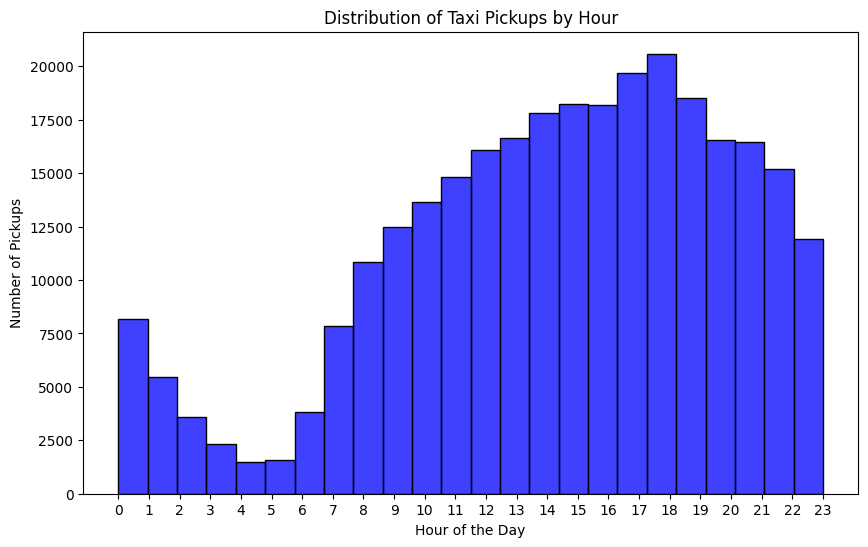

In [128]:
# Find and show the hourly trends in taxi pickups

# Convert tpep_pickup_datetime to datetime format
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])

# Extract hour, day of the week, and month
df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour
df['pickup_day'] = df['tpep_pickup_datetime'].dt.day_name()  # Full day name (e.g., Monday)
df['pickup_month'] = df['tpep_pickup_datetime'].dt.month_name()  # Full month name (e.g., January)

# Plot distribution by hour
plt.figure(figsize=(10, 6))
sns.histplot(df['pickup_hour'], bins=24, kde=False, color='blue')
plt.title('Distribution of Taxi Pickups by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Pickups')
plt.xticks(range(0, 24))  # Ensure all hours are displayed
plt.show()



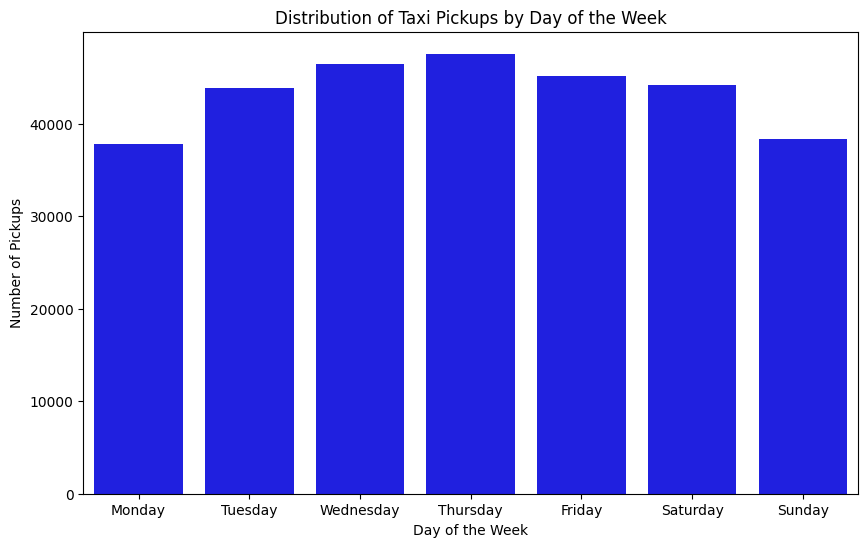

In [61]:
# Find and show the daily trends in taxi pickups (days of the week)

# Order days of the week for proper plotting
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Plot distribution by day of the week
plt.figure(figsize=(10, 6))
sns.countplot(x=df['pickup_day'], order=day_order, color='blue')
plt.title('Distribution of Taxi Pickups by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Pickups')
plt.show()



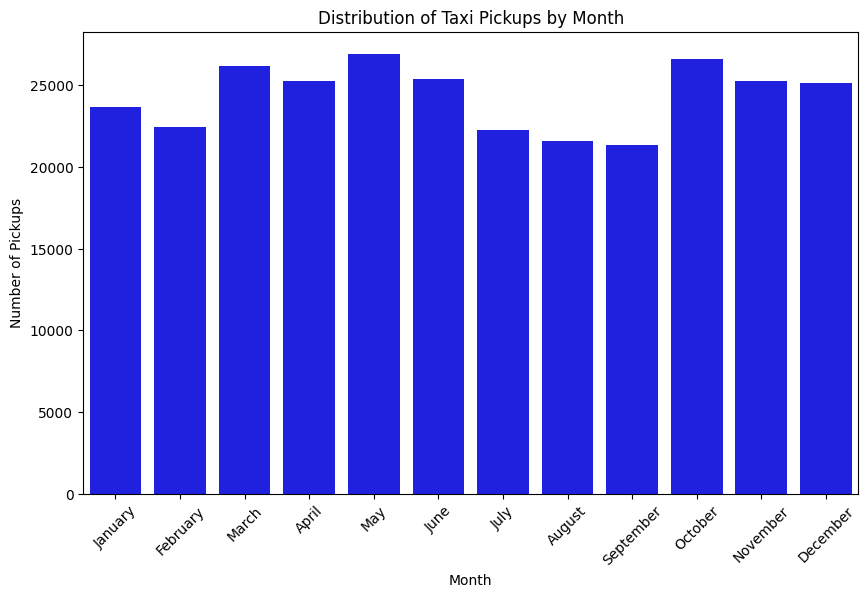

In [129]:
# Show the monthly trends in pickups

# Order months for proper plotting
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']

# Plot distribution by month
plt.figure(figsize=(10, 6))
sns.countplot(x=df['pickup_month'], order=month_order, color='blue')
plt.title('Distribution of Taxi Pickups by Month')
plt.xlabel('Month')
plt.ylabel('Number of Pickups')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

##### Financial Analysis

Take a look at the financial parameters like `fare_amount`, `tip_amount`, `total_amount`, and also `trip_distance`. Do these contain zero/negative values?

Column: fare_amount
Zero values: 48 (0.02%)
Negative values: 0 (0.00%)


Column: tip_amount
Zero values: 64859 (22.22%)
Negative values: 0 (0.00%)


Column: total_amount
Zero values: 11 (0.00%)
Negative values: 0 (0.00%)


Column: trip_distance
Zero values: 2361 (0.81%)
Negative values: 0 (0.00%)




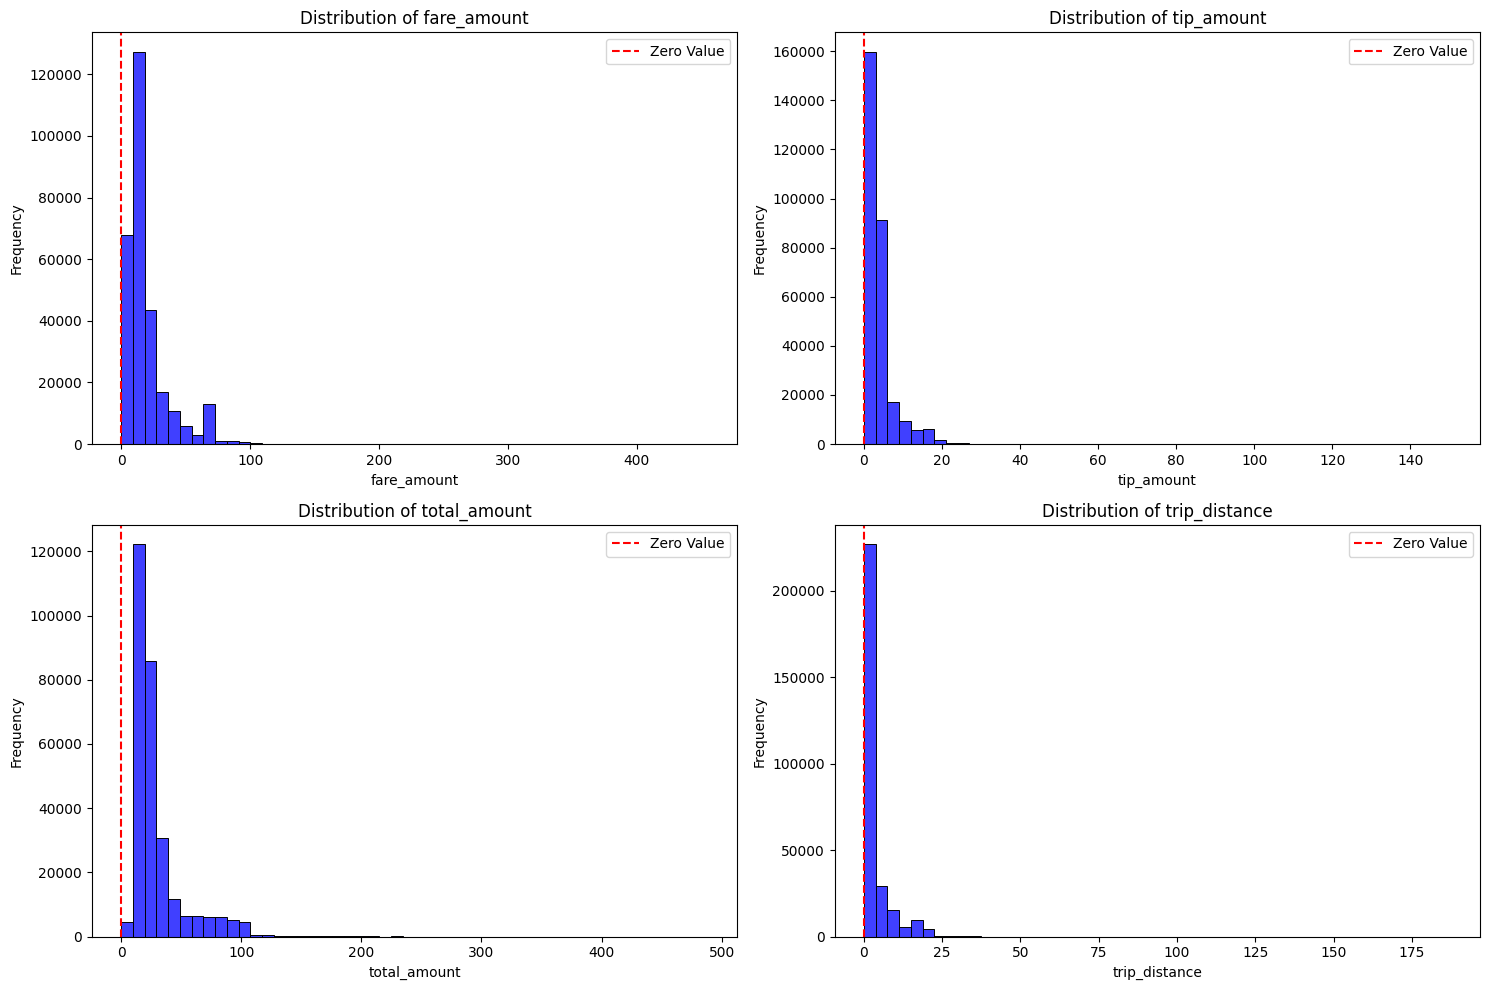

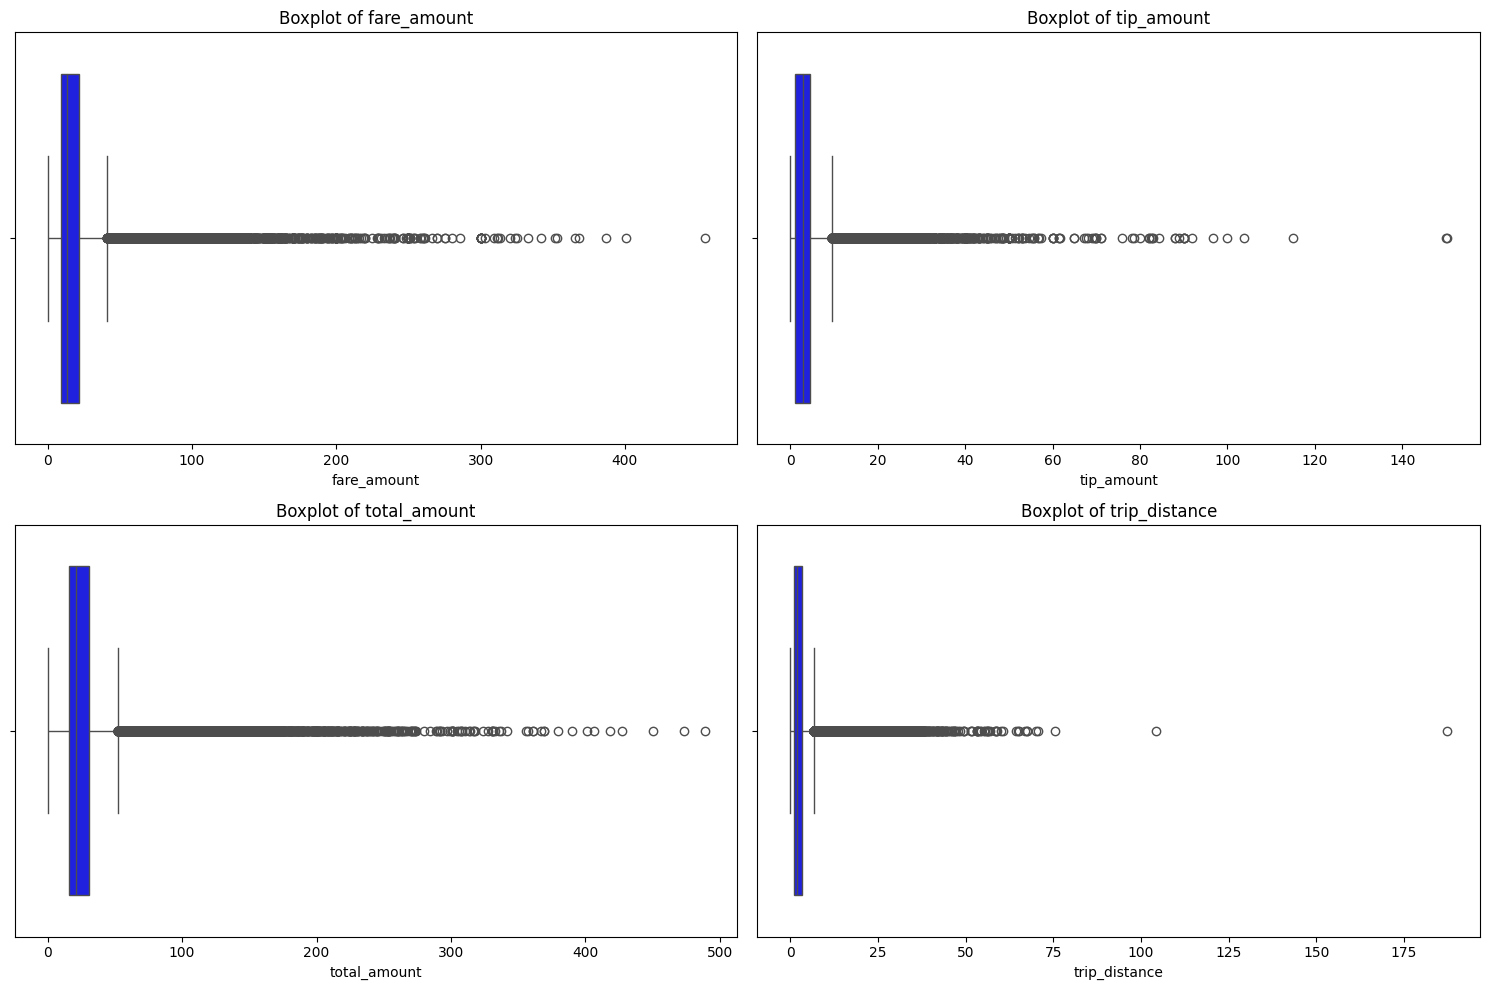

In [130]:
# Analyse the above parameters

# List of columns to analyze
columns_to_check = ['fare_amount', 'tip_amount', 'total_amount', 'trip_distance']

# Step 1: Check for zero and negative values
for column in columns_to_check:
    zero_count = (df[column] == 0).sum()
    negative_count = (df[column] < 0).sum()
    total_count = len(df[column])
    
    print(f"Column: {column}")
    print(f"Zero values: {zero_count} ({(zero_count / total_count) * 100:.2f}%)")
    print(f"Negative values: {negative_count} ({(negative_count / total_count) * 100:.2f}%)")
    print("\n")

# Step 2: Visualize the distribution
# Histograms
plt.figure(figsize=(15, 10))
for i, column in enumerate(columns_to_check, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[column], bins=50, color='blue', kde=False)
    plt.axvline(0, color='red', linestyle='--', label='Zero Value')
    plt.title(f"Distribution of {column}")
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.legend()
plt.tight_layout()
plt.show()

# Boxplots
plt.figure(figsize=(15, 10))
for i, column in enumerate(columns_to_check, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=df[column], color='blue')
    plt.title(f"Boxplot of {column}")
    plt.xlabel(column)
plt.tight_layout()
plt.show()



Do you think it is beneficial to create a copy DataFrame leaving out the zero values from these?

**3.1.3** <font color = red>[2 marks]</font> <br>
Filter out the zero values from the above columns.

**Note:** The distance might be 0 in cases where pickup and drop is in the same zone. Do you think it is suitable to drop such cases of zero distance?

In [131]:
# Create a df with non zero entries for the selected parameters.

df[(df.trip_distance==0) & (df.PULocationID == df.DOLocationID)]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,...,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee_merged,pickup_hour,pickup_day,pickup_month
57,2,2023-01-01 01:34:06,2023-01-01 01:34:14,2.0,0.0,5.0,265,265,1,50.0,...,0.0,10.20,0.0,1.0,61.20,0.0,0.0,1,Sunday,January
76,1,2023-01-01 01:25:41,2023-01-01 01:25:45,1.0,0.0,1.0,148,148,1,3.0,...,0.5,52.00,0.0,1.0,60.00,2.5,0.0,1,Sunday,January
82,1,2023-01-01 01:26:38,2023-01-01 01:27:12,1.0,0.0,5.0,229,229,1,5.0,...,0.0,0.00,0.0,1.0,6.00,0.0,0.0,1,Sunday,January
83,2,2023-01-01 01:20:00,2023-01-01 01:20:02,4.0,0.0,5.0,264,264,1,45.0,...,0.0,0.80,0.0,1.0,46.80,0.0,0.0,1,Sunday,January
132,2,2023-01-01 03:18:36,2023-01-01 03:18:42,1.0,0.0,1.0,113,113,2,3.0,...,0.5,0.00,0.0,1.0,8.00,2.5,0.0,3,Sunday,January
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
302851,2,2023-09-30 13:14:24,2023-09-30 13:14:37,3.0,0.0,2.0,246,246,2,70.0,...,0.5,0.00,0.0,1.0,74.00,2.5,0.0,13,Saturday,September
303071,2,2023-09-30 17:17:25,2023-09-30 17:36:25,1.0,0.0,1.0,264,264,1,15.6,...,0.5,5.88,0.0,1.0,25.48,2.5,0.0,17,Saturday,September
303170,1,2023-09-30 19:44:14,2023-09-30 19:44:36,1.0,0.0,1.0,168,168,2,3.0,...,0.5,0.00,0.0,1.0,4.50,0.0,0.0,19,Saturday,September
303322,1,2023-09-30 22:25:15,2023-09-30 22:25:19,1.0,0.0,1.0,152,152,1,34.5,...,0.5,0.00,0.0,1.0,36.00,0.0,0.0,22,Saturday,September


In [132]:
# Step 1: Identify the rows to drop
rows_to_drop = df[(df['trip_distance'] == 0) & (df['PULocationID'] == df['DOLocationID'])]
print(f"Number of rows to drop: {len(rows_to_drop)}")

# Step 2: Drop the rows
df_cleaned = df.drop(rows_to_drop.index)

# Step 3: Verify the results
print(f"Number of rows before dropping: {len(df)}")
print(f"Number of rows after dropping: {len(df_cleaned)}")
print(f"Rows dropped: {len(df) - len(df_cleaned)}")


Number of rows to drop: 2361
Number of rows before dropping: 291946
Number of rows after dropping: 289585
Rows dropped: 2361


In [133]:


df_cleaned = df[(df['fare_amount'] > 0) & 
                (df['trip_distance'] > 0) & 
                (df['tip_amount'] >= 0)]

**3.1.4** <font color = red>[3 marks]</font> <br>
Analyse the monthly revenue (`total_amount`) trend

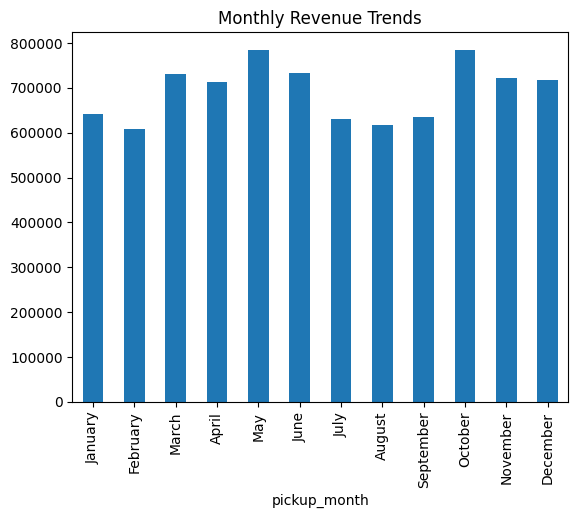

In [134]:
# Group data by month and analyse monthly revenue

monthly_revenue = df_cleaned.groupby('pickup_month')['total_amount'].sum().reindex(month_order)
monthly_revenue.plot(kind='bar')
plt.title('Monthly Revenue Trends')
plt.show()

**3.1.5** <font color = red>[3 marks]</font> <br>
Show the proportion of each quarter of the year in the revenue

In [135]:
# Calculate proportion of each quarter

df_cleaned['pickup_quarter'] = df_cleaned['tpep_pickup_datetime'].dt.quarter
quarterly_revenue = df_cleaned.groupby('pickup_quarter')['total_amount'].sum()
quarterly_revenue_proportion = quarterly_revenue / quarterly_revenue.sum()
print(quarterly_revenue_proportion)

pickup_quarter
1    0.237985
2    0.268170
3    0.226337
4    0.267507
Name: total_amount, dtype: float64


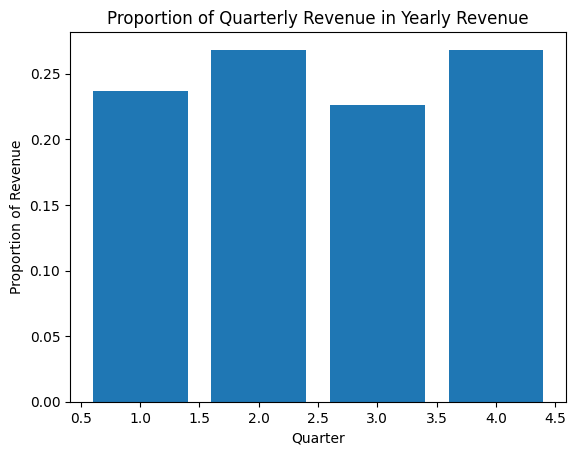

In [69]:

# Plot the bar chart
plt.bar(quarterly_revenue_proportion.index, quarterly_revenue_proportion.values)
plt.title('Proportion of Quarterly Revenue in Yearly Revenue')
plt.xlabel('Quarter')
plt.ylabel('Proportion of Revenue')
plt.show()

**3.1.6** <font color = red>[3 marks]</font> <br>
Visualise the relationship between `trip_distance` and `fare_amount`. Also find the correlation value for these two.

**Hint:** You can leave out the trips with trip_distance = 0

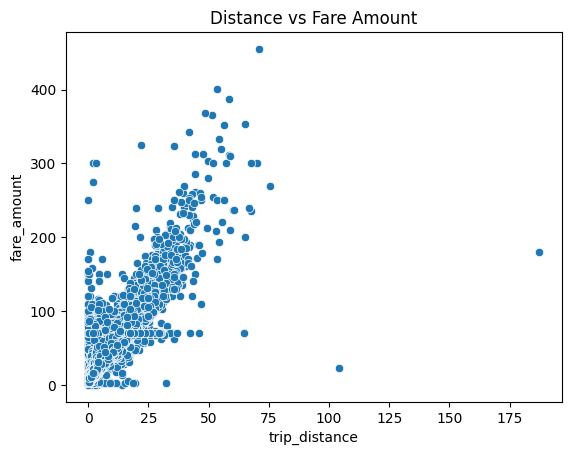

In [136]:
# Show how trip fare is affected by distance

sns.scatterplot(x=df_cleaned['trip_distance'], y=df_cleaned['fare_amount'])
plt.title('Distance vs Fare Amount')
plt.show()

**3.1.7** <font color = red>[5 marks]</font> <br>
Find and visualise the correlation between:
1. `fare_amount` and trip duration (pickup time to dropoff time)
2. `fare_amount` and `passenger_count`
3. `tip_amount` and `trip_distance`

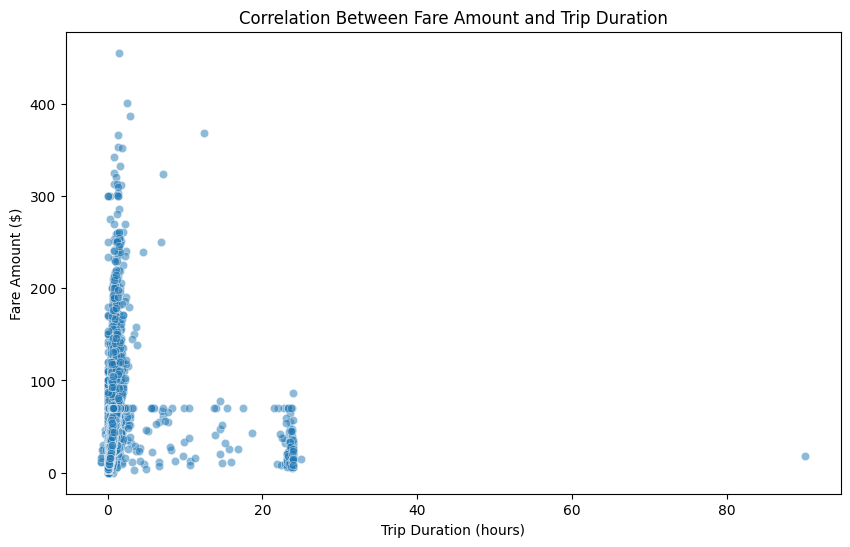

Correlation between fare_amount and trip_duration: 0.28


In [137]:
# Show relationship between fare and trip duration


# Convert datetime columns to datetime format
df_cleaned['tpep_pickup_datetime'] = pd.to_datetime(df_cleaned['tpep_pickup_datetime'])
df_cleaned['tpep_dropoff_datetime'] = pd.to_datetime(df_cleaned['tpep_dropoff_datetime'])

# Calculate trip duration in hours
df_cleaned['trip_duration'] = (df_cleaned['tpep_dropoff_datetime'] - df_cleaned['tpep_pickup_datetime']).dt.total_seconds() / 3600

# 1. Correlation between fare_amount and trip_duration
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_cleaned['trip_duration'], y=df_cleaned['fare_amount'], alpha=0.5)
plt.title('Correlation Between Fare Amount and Trip Duration')
plt.xlabel('Trip Duration (hours)')
plt.ylabel('Fare Amount ($)')
plt.show()

correlation = df_cleaned['fare_amount'].corr(df_cleaned['trip_duration'])
print(f"Correlation between fare_amount and trip_duration: {correlation:.2f}")



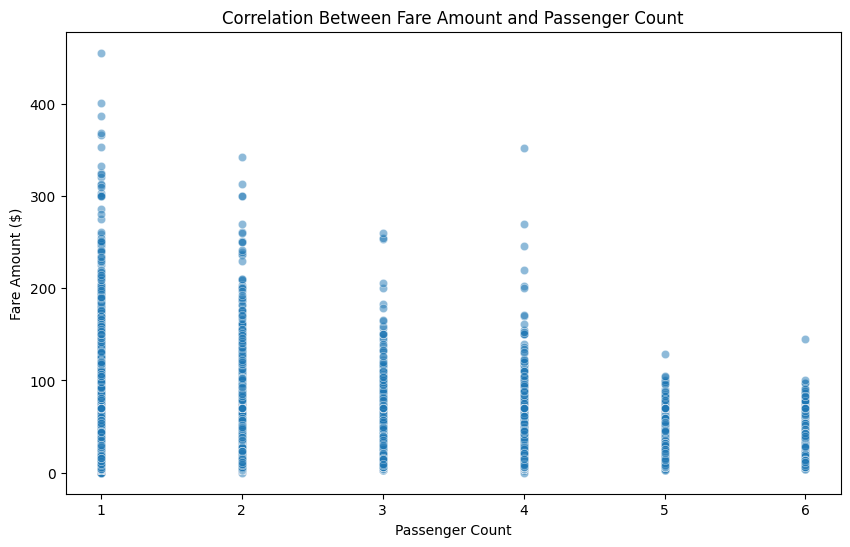

Correlation between fare_amount and passenger_count: 0.04


In [138]:
# Show relationship between fare and number of passengers


# 2. Correlation between fare_amount and passenger_count
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_cleaned['passenger_count'], y=df_cleaned['fare_amount'], alpha=0.5)
plt.title('Correlation Between Fare Amount and Passenger Count')
plt.xlabel('Passenger Count')
plt.ylabel('Fare Amount ($)')
plt.show()

correlation = df_cleaned['fare_amount'].corr(df_cleaned['passenger_count'])
print(f"Correlation between fare_amount and passenger_count: {correlation:.2f}")



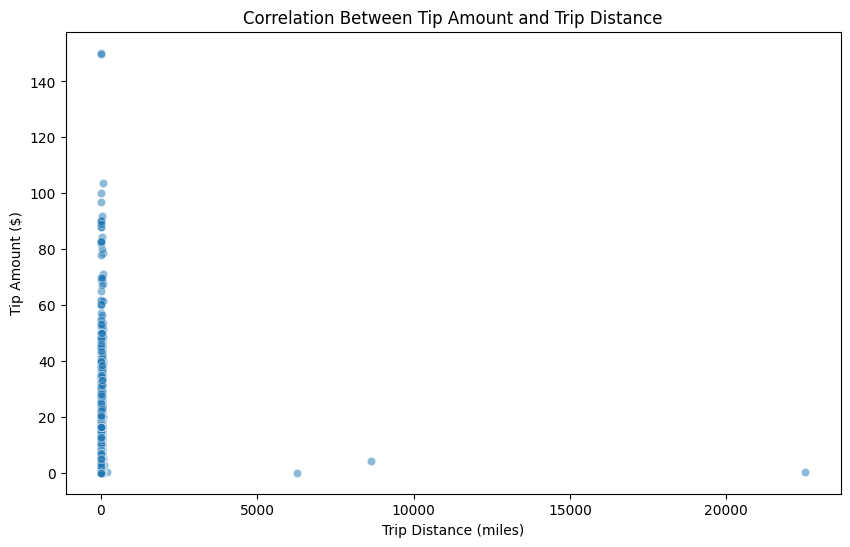

Correlation between tip_amount and trip_distance: 0.06


In [73]:
# Show relationship between tip and trip distance

# 3. Correlation between tip_amount and trip_distance
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_cleaned['trip_distance'], y=df_cleaned['tip_amount'], alpha=0.5)
plt.title('Correlation Between Tip Amount and Trip Distance')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Tip Amount ($)')
plt.show()

correlation = df_cleaned['tip_amount'].corr(df_cleaned['trip_distance'])
print(f"Correlation between tip_amount and trip_distance: {correlation:.2f}")


**3.1.8** <font color = red>[3 marks]</font> <br>
Analyse the distribution of different payment types (`payment_type`)

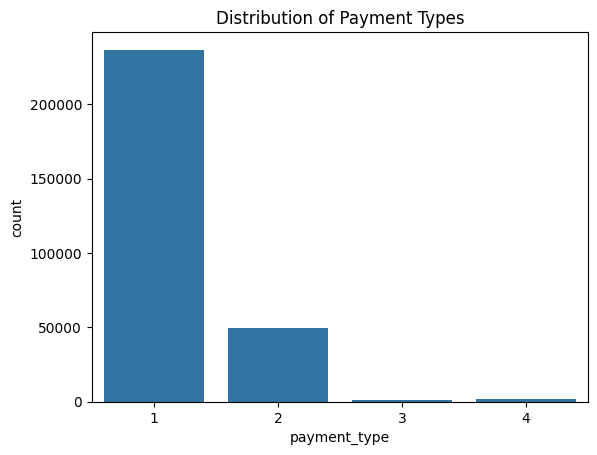

In [139]:
# Analyse the distribution of different payment types (payment_type).


sns.countplot(x=df_cleaned['payment_type'])
plt.title('Distribution of Payment Types')
plt.show()

- 1= Credit card
- 2= Cash
- 3= No charge
- 4= Dispute



##### Geographical Analysis

For this, you have to use the *taxi_zones.shp* file from the *taxi_zones* folder.

There would be multiple files inside the folder (such as *.shx, .sbx, .sbn* etc). You do not need to import/read any of the files other than the shapefile, *taxi_zones.shp*.

Do not change any folder structure - all the files need to be present inside the folder for it to work.

The folder structure should look like this:
```
Taxi Zones
|- taxi_zones.shp.xml
|- taxi_zones.prj
|- taxi_zones.sbn
|- taxi_zones.shp
|- taxi_zones.dbf
|- taxi_zones.shx
|- taxi_zones.sbx

 ```

 You only need to read the `taxi_zones.shp` file. The *shp* file will utilise the other files by itself.

We will use the *GeoPandas* library for geopgraphical analysis
```
import geopandas as gpd
```

More about geopandas and shapefiles: [About](https://geopandas.org/en/stable/about.html)


Reading the shapefile is very similar to *Pandas*. Use `gpd.read_file()` function to load the data (*taxi_zones.shp*) as a GeoDataFrame. Documentation: [Reading and Writing Files](https://geopandas.org/en/stable/docs/user_guide/io.html)

In [140]:
#!pip install geopandas

**3.1.9** <font color = red>[2 marks]</font> <br>
Load the shapefile and display it.

In [141]:
import geopandas as gpd
os.chdir(r"D:\Upgrad\Upgrad_DS\DSC75\EDA\Datasets and Dictionary-NYC\Datasets and Dictionary\taxi_zones")

# Read the shapefile using geopandas
zones = gpd.read_file('taxi_zones.shp')# read the .shp file using gpd
zones.head()


,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry
0,1,0.116357,0.000782,Newark Airport,1,EWR,"POLYGON ((933100.918 192536.086, 933091.011 19..."
1,2,0.433470,0.004866,Jamaica Bay,2,Queens,"MULTIPOLYGON (((1033269.244 172126.008, 103343..."
2,3,0.084341,0.000314,Allerton/Pelham Gardens,3,Bronx,"POLYGON ((1026308.77 256767.698, 1026495.593 2..."
3,4,0.043567,0.000112,Alphabet City,4,Manhattan,"POLYGON ((992073.467 203714.076, 992068.667 20..."
4,5,0.092146,0.000498,Arden Heights,5,Staten Island,"POLYGON ((935843.31 144283.336, 936046.565 144..."


Now, if you look at the DataFrame created, you will see columns like: `OBJECTID`,`Shape_Leng`, `Shape_Area`, `zone`, `LocationID`, `borough`, `geometry`.
<br><br>

Now, the `locationID` here is also what we are using to mark pickup and drop zones in the trip records.

The geometric parameters like shape length, shape area and geometry are used to plot the zones on a map.

This can be easily done using the `plot()` method.

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    263 non-null    int32   
 1   Shape_Leng  263 non-null    float64 
 2   Shape_Area  263 non-null    float64 
 3   zone        263 non-null    object  
 4   LocationID  263 non-null    int32   
 5   borough     263 non-null    object  
 6   geometry    263 non-null    geometry
dtypes: float64(2), geometry(1), int32(2), object(2)
memory usage: 12.5+ KB
None


<Axes: >

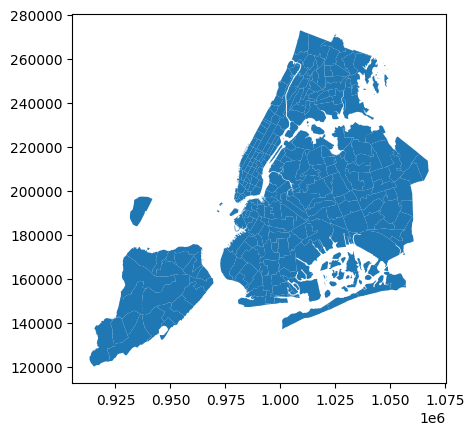

In [142]:
print(zones.info())
zones.plot()

Now, you have to merge the trip records and zones data using the location IDs.



**3.1.10** <font color = red>[3 marks]</font> <br>
Merge the zones data into trip data using the `locationID` and `PULocationID` columns.

In [143]:
# Merge zones and trip records using locationID and PULocationID

df_cleaned = df_cleaned.merge(zones, left_on='PULocationID', right_on='LocationID', how='left')

**3.1.11** <font color = red>[3 marks]</font> <br>
Group data by location IDs to find the total number of trips per location ID

In [144]:
# Group data by location and calculate the number of trips
trips_by_zone = df_cleaned['PULocationID'].value_counts()
print(trips_by_zone)


PULocationID
132    15135
237    13788
161    13625
236    12329
162    10574
       ...  
44         1
192        1
120        1
101        1
214        1
Name: count, Length: 239, dtype: int64


**3.1.12** <font color = red>[2 marks]</font> <br>
Now, use the grouped data to add number of trips to the GeoDataFrame.

We will use this to plot a map of zones showing total trips per zone.

In [145]:
# Merge trip counts back to the zones GeoDataFrame

zones = zones.merge(trips_by_zone.rename('trip_count'), left_on='LocationID', right_index=True, how='left')


The next step is creating a color map (choropleth map) showing zones by the number of trips taken.

Again, you can use the `zones.plot()` method for this. [Plot Method GPD](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html#geopandas.GeoDataFrame.plot)

But first, you need to define the figure and axis for the plot.

`fig, ax = plt.subplots(1, 1, figsize = (12, 10))`

This function creates a figure (fig) and a single subplot (ax)

---

After setting up the figure and axis, we can proceed to plot the GeoDataFrame on this axis. This is done in the next step where we use the plot method of the GeoDataFrame.

You can define the following parameters in the `zones.plot()` method:
```
column = '',
ax = ax,
legend = True,
legend_kwds = {'label': "label", 'orientation': "<horizontal/vertical>"}
```

To display the plot, use `plt.show()`.

**3.1.13** <font color = red>[3 marks]</font> <br>
Plot a color-coded map showing zone-wise trips

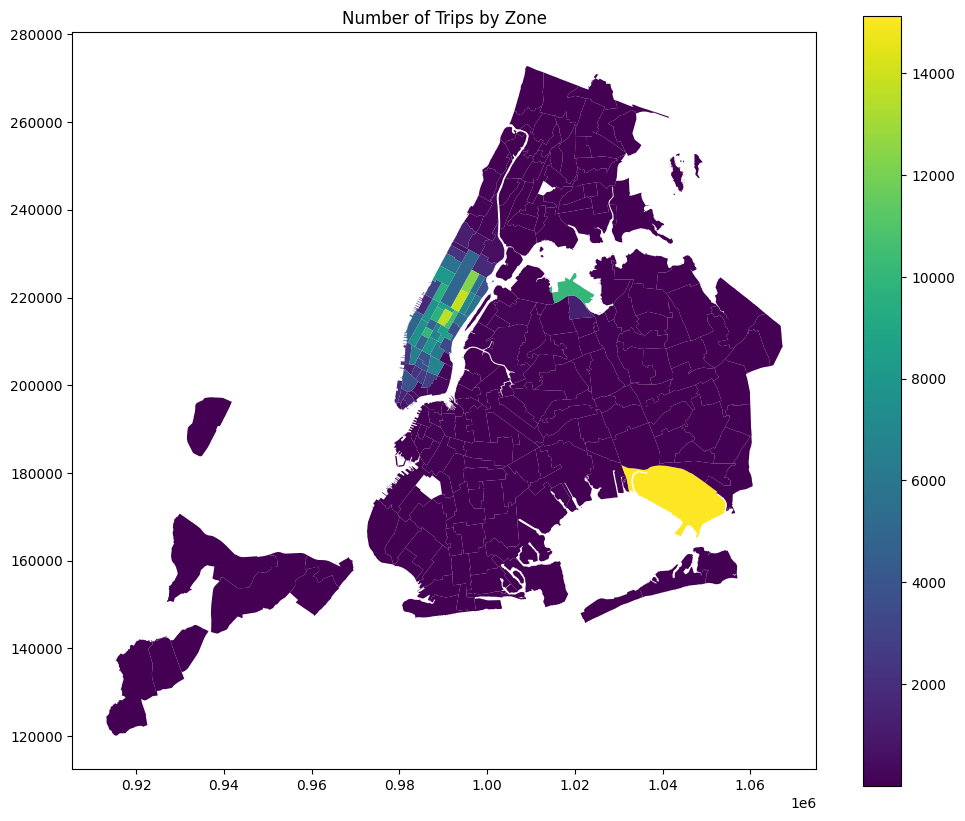

In [146]:
# Define figure and axis
fig, ax = plt.subplots(1, 1, figsize = (12, 10))

# Plot the map and display it

zones.plot(column='trip_count', ax = ax, legend=True)
plt.title('Number of Trips by Zone')
plt.show()




In [147]:
# can you try displaying the zones DF sorted by the number of trips?

# Sort the zones DataFrame by the number of trips (descending order)
zones_sorted = zones.sort_values(by='trip_count', ascending=False)

# Display the sorted DataFrame
print(zones_sorted[['LocationID', 'zone', 'trip_count']].head(10))  # Display top 10 zones

     LocationID                          zone  trip_count
131         132                   JFK Airport     15135.0
236         237         Upper East Side South     13788.0
160         161                Midtown Center     13625.0
235         236         Upper East Side North     12329.0
161         162                  Midtown East     10574.0
137         138             LaGuardia Airport     10093.0
185         186  Penn Station/Madison Sq West      9990.0
229         230     Times Sq/Theatre District      9695.0
141         142           Lincoln Square East      9575.0
169         170                   Murray Hill      8566.0


Here we have completed the temporal, financial and geographical analysis on the trip records.

**Compile your findings from general analysis below:**

You can consider the following points:

* Busiest hours, days and months
* Trends in revenue collected
* Trends in quarterly revenue
* How fare depends on trip distance, trip duration and passenger counts
* How tip amount depends on trip distance
* Busiest zones


#### **3.2** Detailed EDA: Insights and Strategies
<font color = red>[50 marks]</font> <br>

Having performed basic analyses for finding trends and patterns, we will now move on to some detailed analysis focussed on operational efficiency, pricing strategies, and customer experience.

**3.2.1** <font color = red>[3 marks]</font> <br>
Identify slow routes by calculating the average time taken by cabs to get from one zone to another at different hours of the day.

Speed on a route *X* for hour *Y* = (*distance of the route X / average trip duration for hour Y*)

In [148]:
# Find routes which have the slowest speeds at different times of the day


df_cleaned['trip_duration'] = (df_cleaned['tpep_dropoff_datetime'] - df_cleaned['tpep_pickup_datetime']).dt.total_seconds() / 3600
df_cleaned['speed'] = df_cleaned['trip_distance'] / df_cleaned['trip_duration']
slow_routes = df_cleaned.groupby(['PULocationID', 'DOLocationID'])['speed'].mean().sort_values()
print(slow_routes.head(10))

PULocationID  DOLocationID
213           32             -13.514077
113           235              0.048105
134           265              0.073831
220           236              0.096878
128           128              0.115385
231           247              0.142979
42            89               0.216998
3             3                0.529023
238           51               0.603588
70            203              0.648993
Name: speed, dtype: float64


In [150]:
# Remove invalid trips (where trip_duration <= 0)
df_cleaned = df_cleaned[(df_cleaned['trip_duration']>0)]


df_cleaned['trip_duration'] = (df_cleaned['tpep_dropoff_datetime'] - df_cleaned['tpep_pickup_datetime']).dt.total_seconds() / 3600
df_cleaned['speed'] = df_cleaned['trip_distance'] / df_cleaned['trip_duration']
slow_routes = df_cleaned.groupby(['PULocationID', 'DOLocationID'])['speed'].mean().sort_values()
print(slow_routes.head(10))

PULocationID  DOLocationID
113           235             0.048105
134           265             0.073831
220           236             0.096878
128           128             0.115385
231           247             0.142979
42            89              0.216998
3             3               0.529023
238           51              0.603588
70            203             0.648993
230           51              0.717799
Name: speed, dtype: float64


How does identifying high-traffic, high-demand routes help us?

Finding high traffic and high demand routes helps in strategic decisions as to where to place higher number of taxis to get greater number of passengers


**3.2.2** <font color = red>[3 marks]</font> <br>
Calculate the number of trips at each hour of the day and visualise them. Find the busiest hour and show the number of trips for that hour.

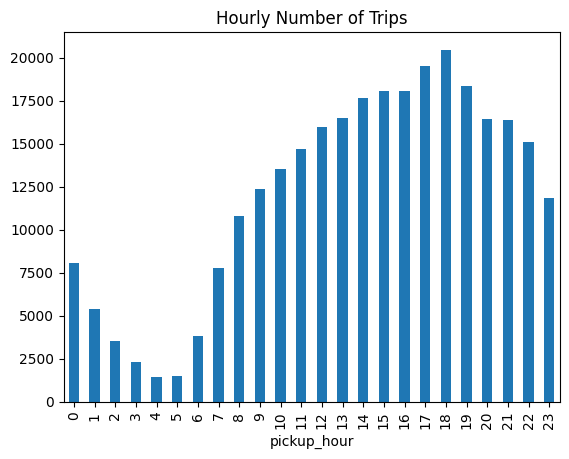

In [151]:
# Visualise the number of trips per hour and find the busiest hour

hourly_trips = df_cleaned['pickup_hour'].value_counts().sort_index()
hourly_trips.plot(kind='bar')
plt.title('Hourly Number of Trips')
plt.show()

Remember, we took a fraction of trips. To find the actual number, you have to scale the number up by the sampling ratio.


**3.2.3** <font color = red>[2 mark]</font> <br>
Find the actual number of trips in the five busiest hours

In [ ]:
# Scale up the number of trips

# Fill in the value of your sampling fraction and use that to scale up the numbers
sample_fraction = 0.008



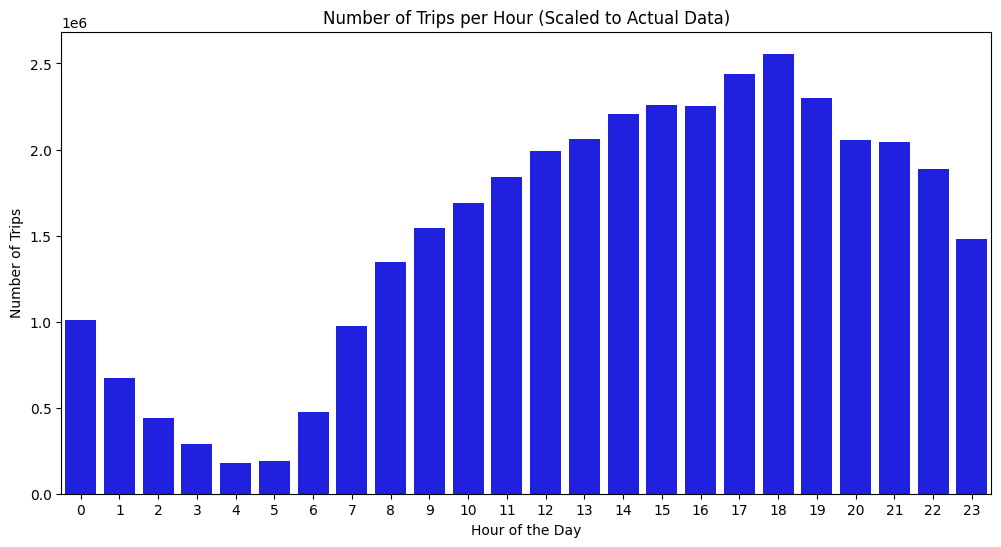

The busiest hour is 18:00 with approximately 2556750 trips.


In [152]:
# Convert tpep_pickup_datetime to datetime format
df_cleaned['tpep_pickup_datetime'] = pd.to_datetime(df_cleaned['tpep_pickup_datetime'])

# Step 1: Extract the hour from the pickup datetime
df_cleaned['pickup_hour'] = df_cleaned['tpep_pickup_datetime'].dt.hour

# Step 2: Count the number of trips per hour
trips_per_hour = df_cleaned['pickup_hour'].value_counts().sort_index()

# Step 3: Scale up the number of trips by the sampling ratio (0.001)
sampling_ratio = 0.008
trips_per_hour_scaled = trips_per_hour / sampling_ratio

# Step 4: Visualize the number of trips per hour
plt.figure(figsize=(12, 6))
sns.barplot(x=trips_per_hour_scaled.index, y=trips_per_hour_scaled.values, color='blue')
plt.title('Number of Trips per Hour (Scaled to Actual Data)')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Trips')
plt.xticks(range(0, 24))  # Ensure all hours are displayed
plt.show()

# Step 5: Find the busiest hour
busiest_hour = trips_per_hour_scaled.idxmax()
busiest_hour_trips = trips_per_hour_scaled.max()
print(f"The busiest hour is {busiest_hour}:00 with approximately {busiest_hour_trips:.0f} trips.")

In [153]:
hourly_trips.sort_values(ascending=False).head()/(0.008)

pickup_hour
18    2556750.0
17    2441375.0
19    2297250.0
15    2258375.0
16    2254500.0
Name: count, dtype: float64

**3.2.4** <font color = red>[3 marks]</font> <br>
Compare hourly traffic pattern on weekdays. Also compare for weekend.

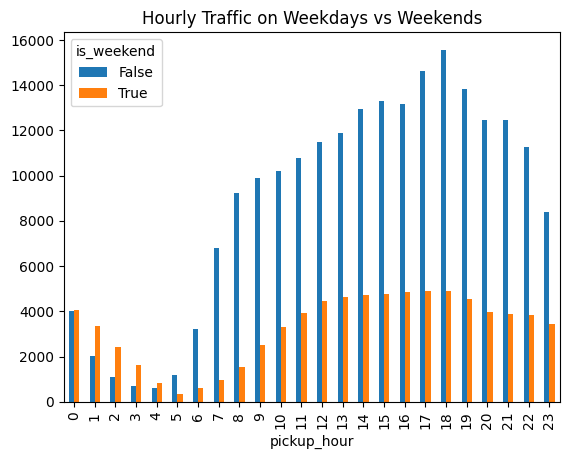

In [154]:
# Compare traffic trends for the week days and weekends

df_cleaned['is_weekend'] = df_cleaned['pickup_day'].isin(['Saturday', 'Sunday'])
hourly_traffic = df_cleaned.groupby(['pickup_hour', 'is_weekend']).size().unstack()
hourly_traffic.plot(kind='bar')
plt.title('Hourly Traffic on Weekdays vs Weekends')
plt.show()

What can you infer from the above patterns? How will finding busy and quiet hours for each day help us?

**3.2.5** <font color = red>[3 marks]</font> <br>
Identify top 10 zones with high hourly pickups. Do the same for hourly dropoffs. Show pickup and dropoff trends in these zones.

In [155]:
# Find top 10 pickup and dropoff zones

top_pickup_zones = df_cleaned['PULocationID'].value_counts().head(10).index
top_dropoff_zones = df_cleaned['DOLocationID'].value_counts().head(10).index
print(top_pickup_zones, top_dropoff_zones)

Index([132, 237, 161, 236, 162, 138, 186, 230, 142, 170], dtype='int64', name='PULocationID') Index([236, 237, 161, 230, 170, 162, 142, 239, 141, 68], dtype='int64', name='DOLocationID')


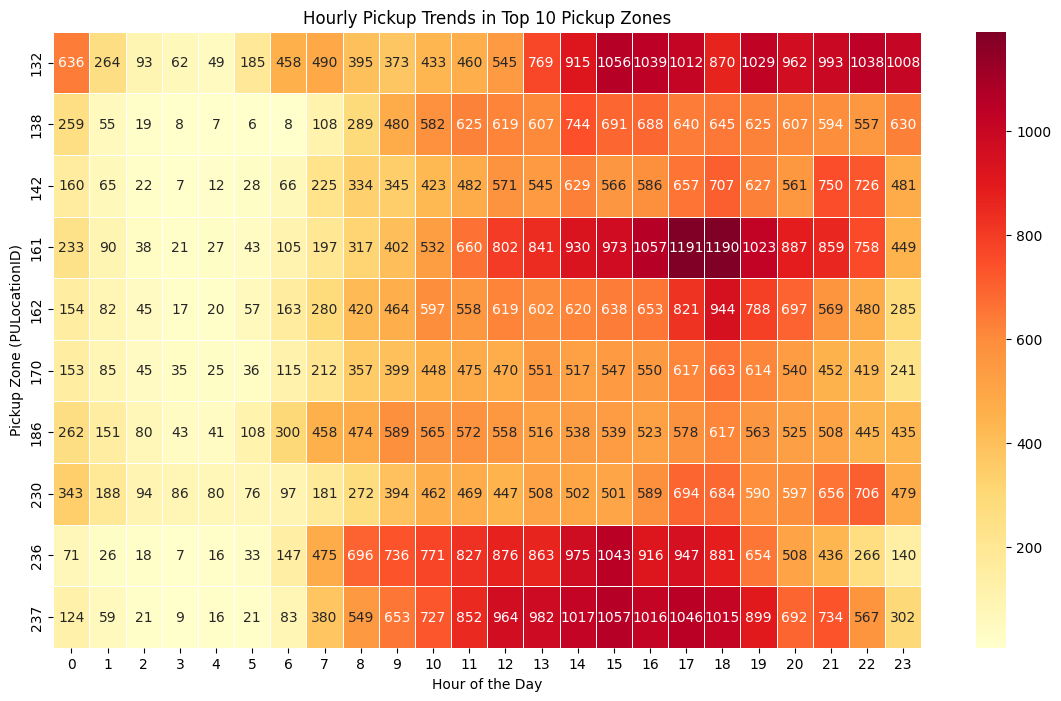

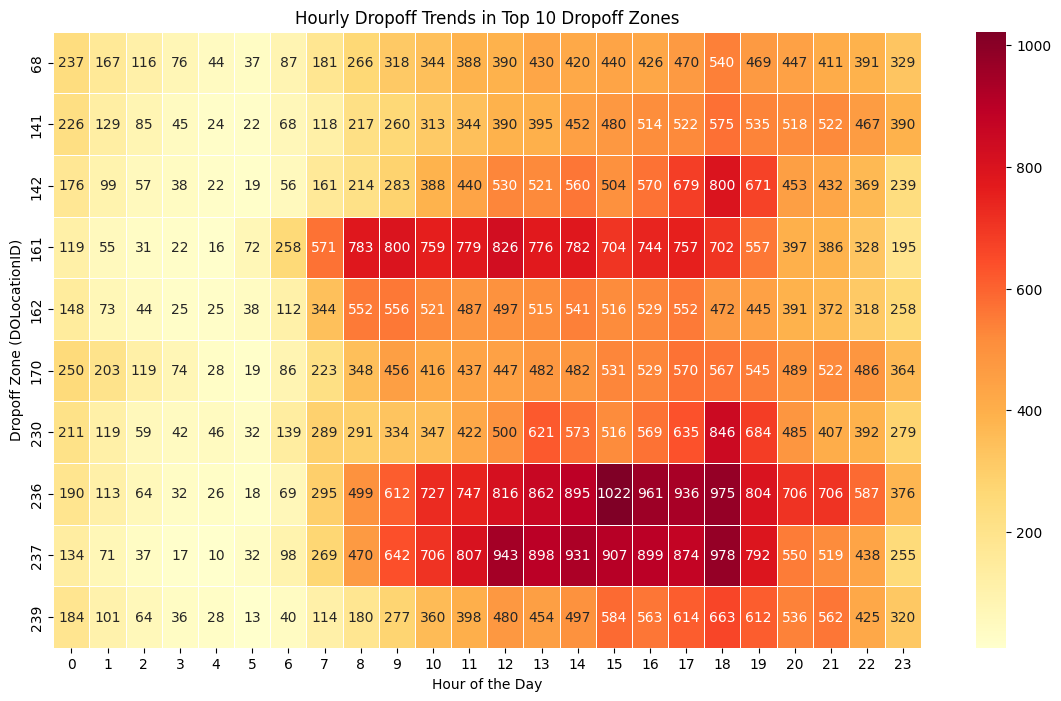

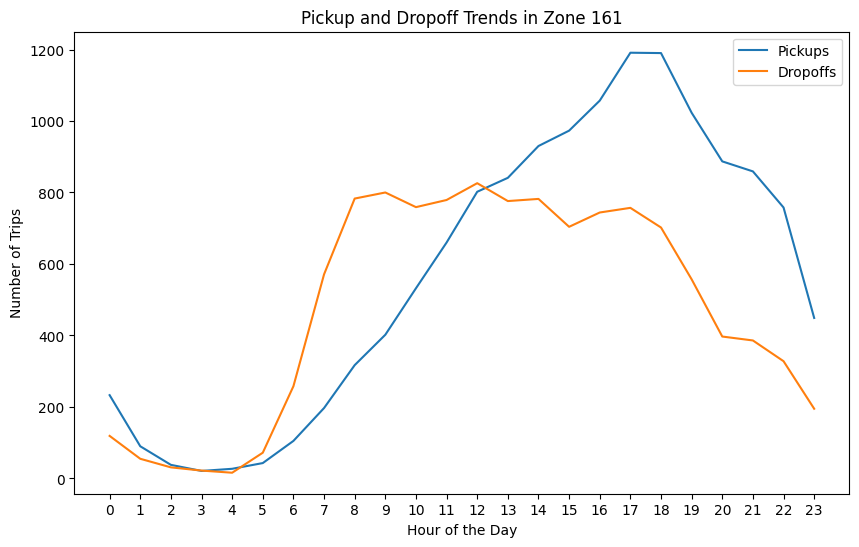

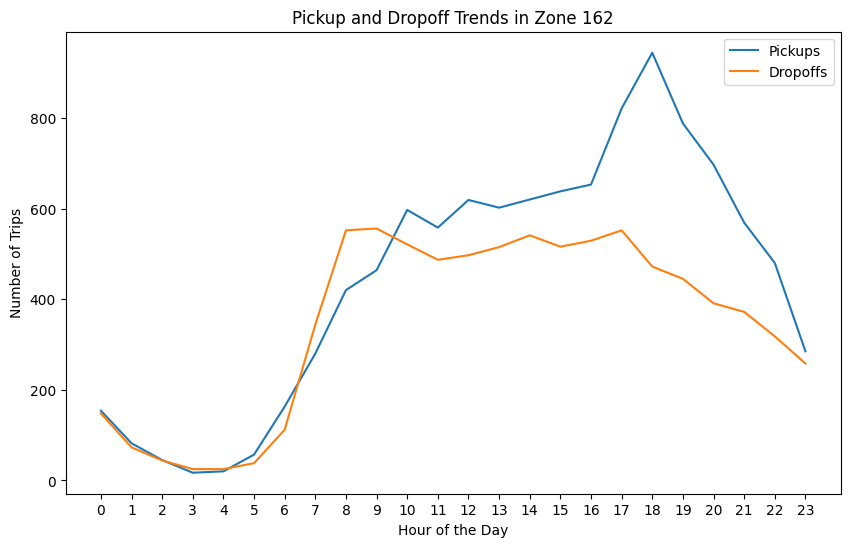

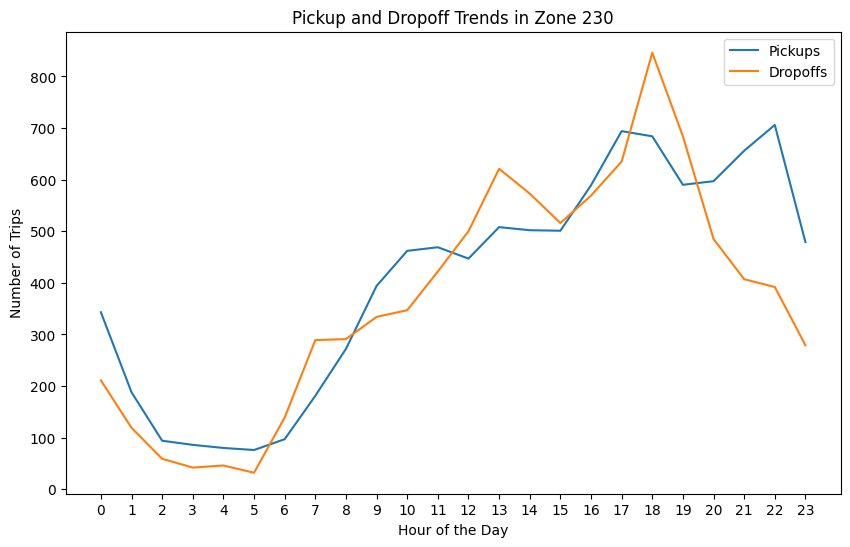

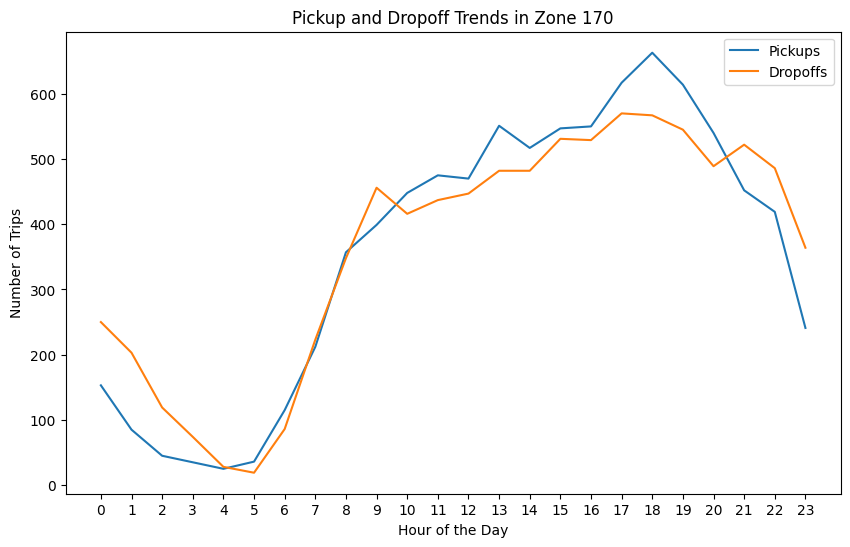

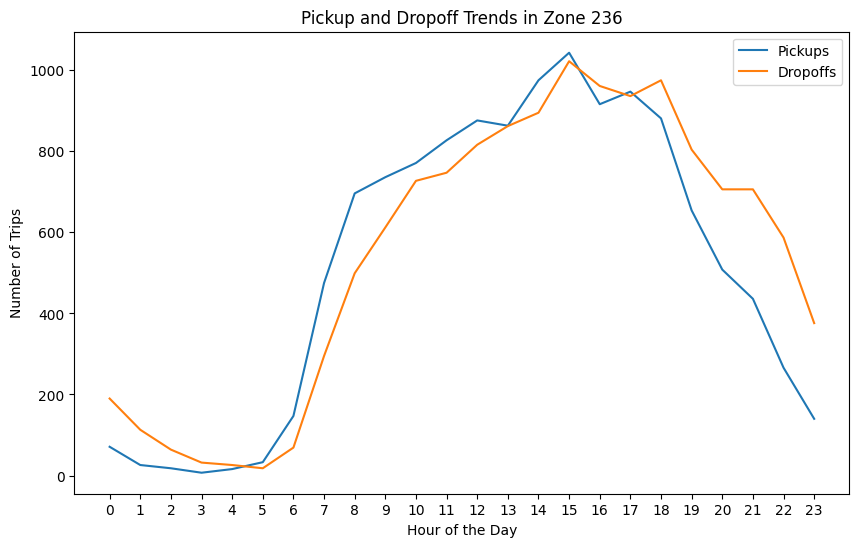

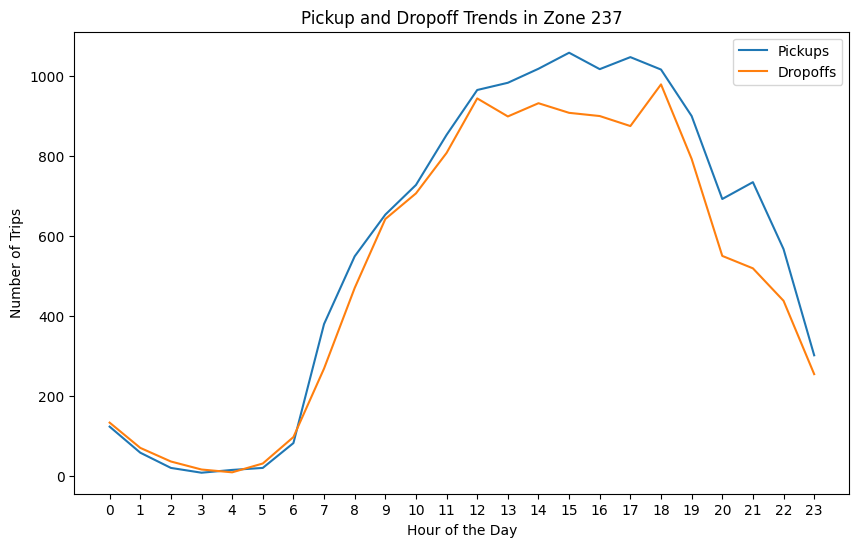

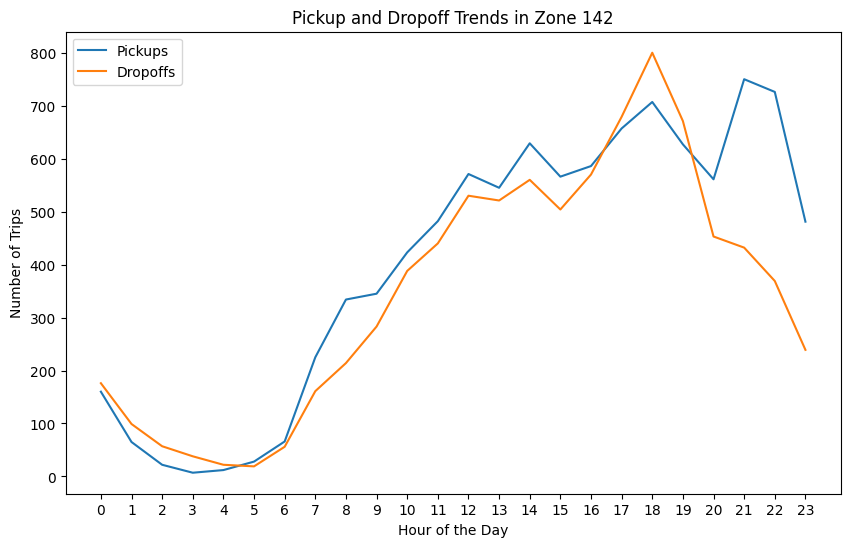

In [156]:
# Step 2: Extract hour from pickup and dropoff datetime
df_cleaned['pickup_hour'] = df_cleaned['tpep_pickup_datetime'].dt.hour
df_cleaned['dropoff_hour'] = df_cleaned['tpep_dropoff_datetime'].dt.hour

# Step 3: Create a pivot table for hourly pickups in top 10 pickup zones
pickup_pivot = df_cleaned[df_cleaned['PULocationID'].isin(top_pickup_zones)].pivot_table(
    index='PULocationID', columns='pickup_hour', values='tpep_pickup_datetime', aggfunc='count', fill_value=0
)

# Step 4: Create a pivot table for hourly dropoffs in top 10 dropoff zones
dropoff_pivot = df_cleaned[df_cleaned['DOLocationID'].isin(top_dropoff_zones)].pivot_table(
    index='DOLocationID', columns='dropoff_hour', values='tpep_dropoff_datetime', aggfunc='count', fill_value=0
)

# Step 5: Plot heatmaps for pickup and dropoff trends
plt.figure(figsize=(14, 8))
sns.heatmap(pickup_pivot, cmap='YlOrRd', annot=True, fmt='d', linewidths=0.5)
plt.title('Hourly Pickup Trends in Top 10 Pickup Zones')
plt.xlabel('Hour of the Day')
plt.ylabel('Pickup Zone (PULocationID)')
plt.show()

plt.figure(figsize=(14, 8))
sns.heatmap(dropoff_pivot, cmap='YlOrRd', annot=True, fmt='d', linewidths=0.5)
plt.title('Hourly Dropoff Trends in Top 10 Dropoff Zones')
plt.xlabel('Hour of the Day')
plt.ylabel('Dropoff Zone (DOLocationID)')
plt.show()

# Step 6: Compare pickup and dropoff trends for the same zone (if any overlap)
common_zones = set(top_pickup_zones).intersection(set(top_dropoff_zones))
if common_zones:
    for zone in common_zones:
        plt.figure(figsize=(10, 6))
        pickup_data = df_cleaned[df_cleaned['PULocationID'] == zone]
        dropoff_data = df_cleaned[df_cleaned['DOLocationID'] == zone]
        hourly_pickups = pickup_data['pickup_hour'].value_counts().sort_index()
        hourly_dropoffs = dropoff_data['dropoff_hour'].value_counts().sort_index()
        
        sns.lineplot(x=hourly_pickups.index, y=hourly_pickups.values, label='Pickups')
        sns.lineplot(x=hourly_dropoffs.index, y=hourly_dropoffs.values, label='Dropoffs')
        
        plt.title(f'Pickup and Dropoff Trends in Zone {zone}')
        plt.xlabel('Hour of the Day')
        plt.ylabel('Number of Trips')
        plt.xticks(range(0, 24))
        plt.legend()
        plt.show()
else:
    print("No common zones in the top 10 pickup and dropoff zones.")


**3.2.6** <font color = red>[3 marks]</font> <br>
Find the ratio of pickups and dropoffs in each zone. Display the 10 highest (pickup/drop) and 10 lowest (pickup/drop) ratios.

In [157]:
# Find the top 10 and bottom 10 pickup/dropoff ratios

pickup_dropoff_ratio = df_cleaned['PULocationID'].value_counts() / df_cleaned['DOLocationID'].value_counts()
print(pickup_dropoff_ratio)

1      0.006211
3      0.444444
4      0.263602
5      0.500000
6      0.600000
         ...   
261    1.151085
262    0.812734
263    0.909076
264    0.949229
265    0.039747
Name: count, Length: 255, dtype: float64


In [158]:
pickup_dropoff_ratio.sort_values(ascending=True).head(10)

1      0.006211
257    0.023438
252    0.033898
192    0.037037
37     0.037543
112    0.039394
265    0.039747
200    0.041237
178    0.041667
101    0.043478
Name: count, dtype: float64

In [159]:
pickup_dropoff_ratio.sort_values(ascending=False).head(10)

70     9.144828
132    4.978289
138    2.946001
186    1.534491
43     1.374031
249    1.359664
114    1.336662
162    1.269115
161    1.193187
100    1.188141
Name: count, dtype: float64

**3.2.7** <font color = red>[3 marks]</font> <br>
Identify zones with high pickup and dropoff traffic during night hours (11PM to 5AM)

In [180]:
# During night hours (11pm to 5am) find the top 10 pickup and dropoff zones
# Note that the top zones should be of night hours and not the overall top zones
night_trips = df_cleaned[(df_cleaned['pickup_hour'] >= 23) | (df_cleaned['pickup_hour'] < 6)]
top_night_zones = night_trips['PULocationID'].value_counts().head(10)
print(top_night_zones)



PULocationID
79     2486
132    2297
249    2008
48     1633
148    1546
230    1346
114    1344
186    1120
138     984
164     964
Name: count, dtype: int64


Now, let us find the revenue share for the night time hours and the day time hours. After this, we will move to deciding a pricing strategy.

**3.2.8** <font color = red>[2 marks]</font> <br>
Find the revenue share for nighttime and daytime hours.

In [161]:
# Filter for night hours (11 PM to 5 AM)

night_revenue = night_trips['total_amount'].sum()
day_revenue = df_cleaned[~((df_cleaned['pickup_hour'] >= 22) | (df_cleaned['pickup_hour'] < 6))]['total_amount'].sum()
print(f"Nighttime Revenue Share: {night_revenue / (night_revenue + day_revenue) * 100:.2f}%")

Nighttime Revenue Share: 17.36%


##### Pricing Strategy

**3.2.9** <font color = red>[2 marks]</font> <br>
For the different passenger counts, find the average fare per mile per passenger.

For instance, suppose the average fare per mile for trips with 3 passengers is 3 USD/mile, then the fare per mile per passenger will be 1 USD/mile.

In [162]:
# Analyse the fare per mile per passenger for different passenger counts


df_cleaned['fare_per_mile_per_passenger'] = df_cleaned['fare_amount'] / (df_cleaned['trip_distance'] * df_cleaned['passenger_count'])
fare_by_passengers = df_cleaned.groupby('passenger_count')['fare_per_mile_per_passenger'].mean()
print(fare_by_passengers)

passenger_count
1.0    10.699063
2.0     6.207085
3.0     4.211835
4.0     5.328880
5.0     1.579179
6.0     1.277748
Name: fare_per_mile_per_passenger, dtype: float64


**3.2.10** <font color = red>[3 marks]</font> <br>
Find the average fare per mile by hours of the day and by days of the week

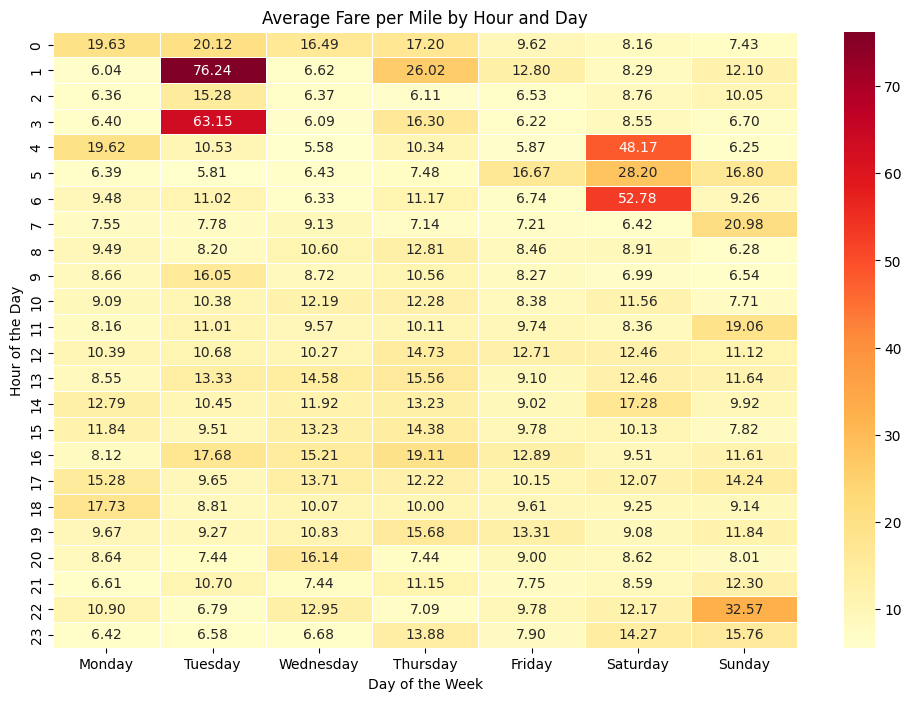

In [163]:
# Compare the average fare per mile for different days and for different times of the day

# Step 1: Calculate the average fare per mile
df_cleaned['fare_per_mile'] = df_cleaned['fare_amount'] / df_cleaned['trip_distance']

pivot_table = df_cleaned.pivot_table(
    index='pickup_hour',  # Rows: Hours of the day
    columns='pickup_day',  # Columns: Days of the week
    values='fare_per_mile',  # Values: Average fare per mile
    aggfunc='mean',  # Calculate the mean
    fill_value=0  # Fill missing values with 0
)

# Reorder columns to match days of the week
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
pivot_table = pivot_table[day_order]

# Step 3: Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, cmap='YlOrRd', annot=True, fmt='.2f', linewidths=0.5)
plt.title('Average Fare per Mile by Hour and Day')
plt.xlabel('Day of the Week')
plt.ylabel('Hour of the Day')
plt.show()


In [164]:
fare_per_mile1 = df_cleaned.groupby('pickup_hour')['fare_amount'].mean() / df.groupby('pickup_hour')['trip_distance'].mean()
print(fare_per_mile1)

pickup_hour
0     5.078541
1     5.262505
2     5.276622
3     5.168044
4     4.849954
5     4.533636
6     4.694623
7     5.225211
8     5.766110
9     5.861268
10    5.938458
11    6.062909
12    6.077462
13    5.923725
14    5.895531
15    5.919628
16    5.961875
17    6.076246
18    6.045125
19    5.674693
20    5.415931
21    5.359763
22    5.273311
23    5.067391
dtype: float64


In [165]:
fare_per_mile2 = df_cleaned.groupby('pickup_day')['fare_amount'].mean() / df_cleaned.groupby('pickup_day')['trip_distance'].mean()
print(fare_per_mile2)

pickup_day
Friday       5.669648
Monday       5.326296
Saturday     5.713018
Sunday       5.209142
Thursday     5.857490
Tuesday      5.770823
Wednesday    5.833823
dtype: float64


**3.2.11** <font color = red>[3 marks]</font> <br>
Analyse the average fare per mile for the different vendors for different hours of the day

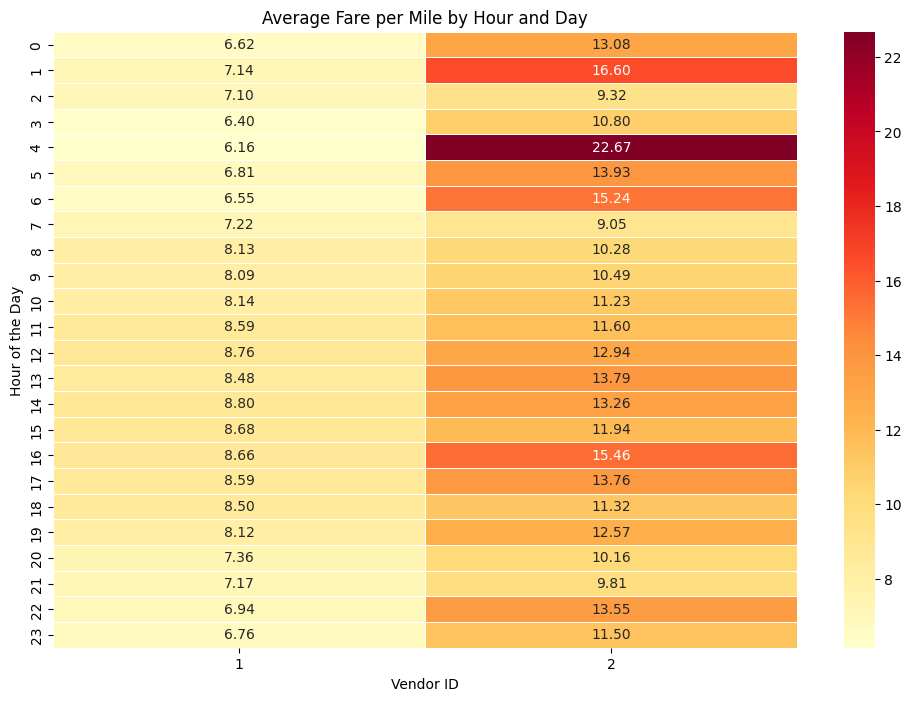

In [166]:
# Compare fare per mile for different vendors

pivot_table = df_cleaned.pivot_table(
    index='pickup_hour',  # Rows: Hours of the day
    columns='VendorID',  # Columns: Vendor
    values='fare_per_mile',  # Values: Average fare per mile
    aggfunc='mean',  # Calculate the mean
    fill_value=0  # Fill missing values with 0
)



# Step 3: Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, cmap='YlOrRd', annot=True, fmt='.2f', linewidths=0.5)
plt.title('Average Fare per Mile by Hour and Day')
plt.xlabel('Vendor ID')
plt.ylabel('Hour of the Day')
plt.show()

In [167]:
fare_per_mile_by_vendor = df.groupby('VendorID')['fare_amount'].mean() / df.groupby('VendorID')['trip_distance'].mean()
print(fare_per_mile_by_vendor)

VendorID
1    5.697545
2    5.706576
dtype: float64


**3.2.12** <font color = red>[5 marks]</font> <br>
Compare the fare rates of the different vendors in a tiered fashion. Analyse the average fare per mile for distances upto 2 miles. Analyse the fare per mile for distances from 2 to 5 miles. And then for distances more than 5 miles.


In [168]:
# Defining distance tiers
df_cleaned['distance_tier'] = pd.cut(df_cleaned['trip_distance'], bins=[0, 2, 5, float('inf')], labels=['0-2 miles', '2-5 miles', '5+ miles'])

# Group by VendorID and distance_tier, and calculate the average fare per mile
fare_by_vendor_distance = df_cleaned.groupby(['VendorID', 'distance_tier'])['fare_per_mile'].mean().unstack()

# Print the results
print(fare_by_vendor_distance)

distance_tier  0-2 miles  2-5 miles  5+ miles
VendorID                                     
1               9.784701   6.379998  4.415945
2              17.723540   6.543767  4.502578


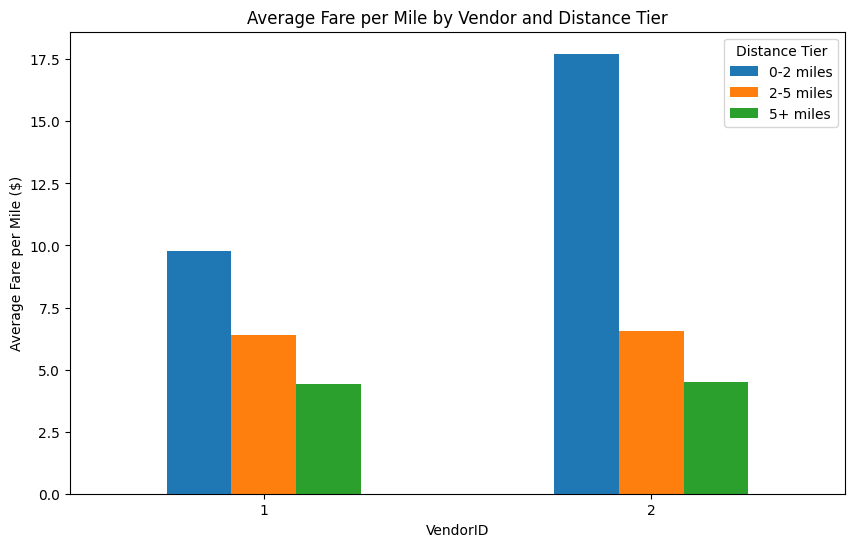

In [169]:
# Plot the results
fare_by_vendor_distance.plot(kind='bar', figsize=(10, 6))
plt.title('Average Fare per Mile by Vendor and Distance Tier')
plt.xlabel('VendorID')
plt.ylabel('Average Fare per Mile ($)')
plt.xticks(rotation=0)
plt.legend(title='Distance Tier')
plt.show()

##### Customer Experience and Other Factors

**3.2.13** <font color = red>[5 marks]</font> <br>
Analyse average tip percentages based on trip distances, passenger counts and time of pickup. What factors lead to low tip percentages?

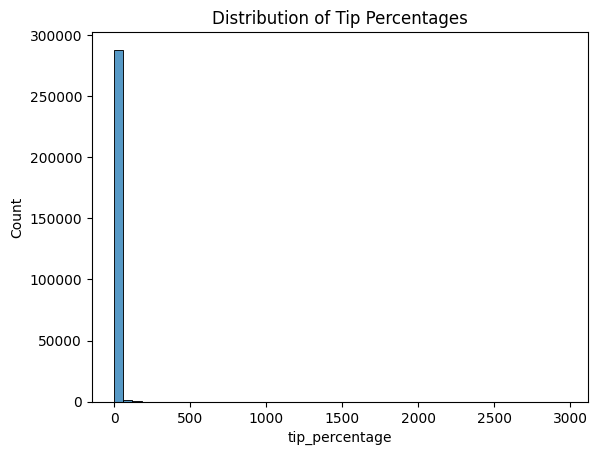

In [170]:
#  Analyze tip percentages based on distances, passenger counts and pickup times

df_cleaned['tip_percentage'] = df_cleaned['tip_amount'] / df_cleaned['fare_amount'] * 100
sns.histplot(df_cleaned['tip_percentage'], bins=50)
plt.title('Distribution of Tip Percentages')
plt.show()

Additional analysis [optional]: Let's try comparing cases of low tips with cases of high tips to find out if we find a clear aspect that drives up the tipping behaviours

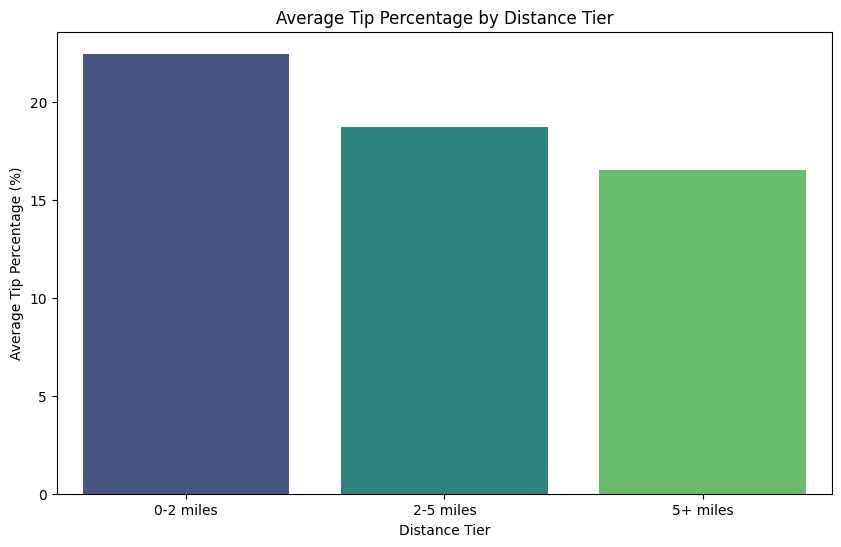

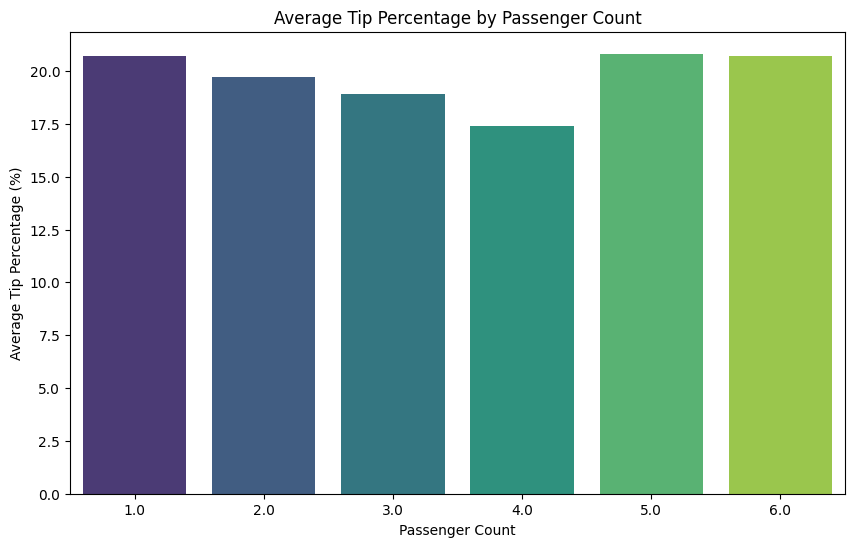

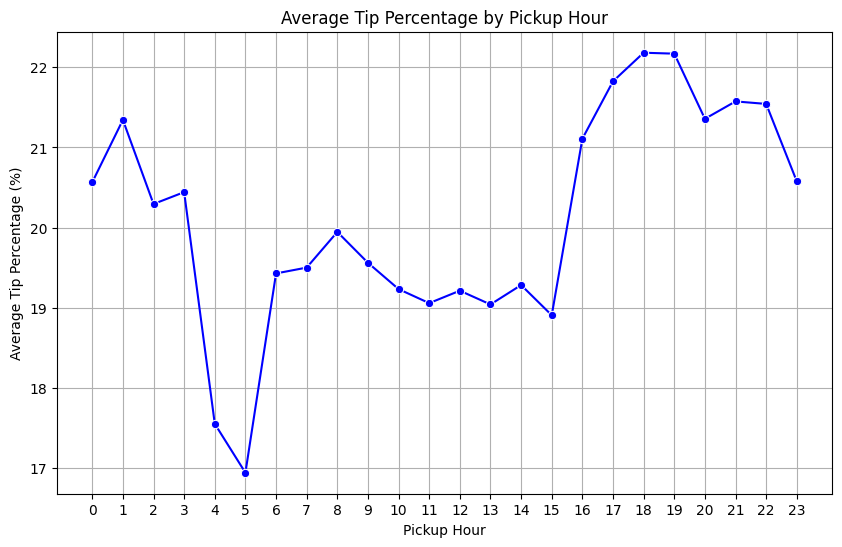

In [171]:
# Compare trips with tip percentage < 10% to trips with tip percentage > 25%

tip_by_distance = df_cleaned.groupby('distance_tier')['tip_percentage'].mean()

# Analyze tip percentages by passenger count
# Group by passenger count and calculate average tip percentage
tip_by_passenger = df_cleaned.groupby('passenger_count')['tip_percentage'].mean()

# Analyze tip percentages by pickup time

# Group by pickup hour and calculate average tip percentage
tip_by_hour = df_cleaned.groupby('pickup_hour')['tip_percentage'].mean()

# Visualize the results
# Plot tip percentages by distance
plt.figure(figsize=(10, 6))
sns.barplot(x=tip_by_distance.index, y=tip_by_distance.values, palette='viridis')
plt.title('Average Tip Percentage by Distance Tier')
plt.xlabel('Distance Tier')
plt.ylabel('Average Tip Percentage (%)')
plt.show()

# Plot tip percentages by passenger count
plt.figure(figsize=(10, 6))
sns.barplot(x=tip_by_passenger.index, y=tip_by_passenger.values, palette='viridis')
plt.title('Average Tip Percentage by Passenger Count')
plt.xlabel('Passenger Count')
plt.ylabel('Average Tip Percentage (%)')
plt.show()

# Plot tip percentages by pickup hour
plt.figure(figsize=(10, 6))
sns.lineplot(x=tip_by_hour.index, y=tip_by_hour.values, marker='o', color='blue')
plt.title('Average Tip Percentage by Pickup Hour')
plt.xlabel('Pickup Hour')
plt.ylabel('Average Tip Percentage (%)')
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()


**3.2.14** <font color = red>[3 marks]</font> <br>
Analyse the variation of passenger count across hours and days of the week.

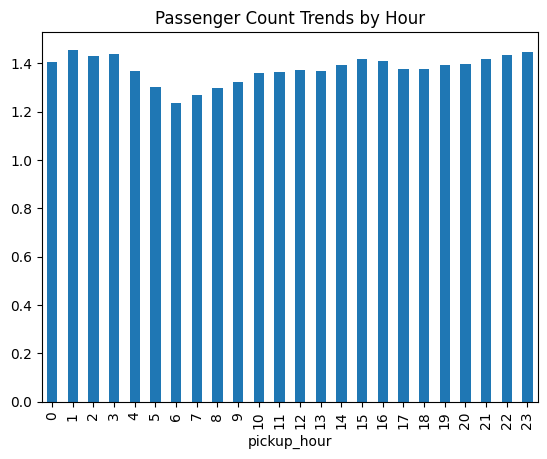

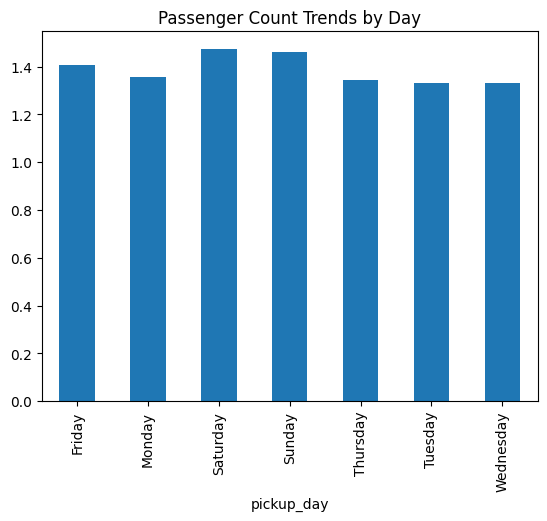

In [172]:
# See how passenger count varies across hours and days


passenger_trends = df_cleaned.groupby('pickup_hour')['passenger_count'].mean()
passenger_trends.plot(kind='bar')
plt.title('Passenger Count Trends by Hour')
plt.show()


passenger_trends2 = df_cleaned.groupby('pickup_day')['passenger_count'].mean()
passenger_trends2.plot(kind='bar')
plt.title('Passenger Count Trends by Day')
plt.show()

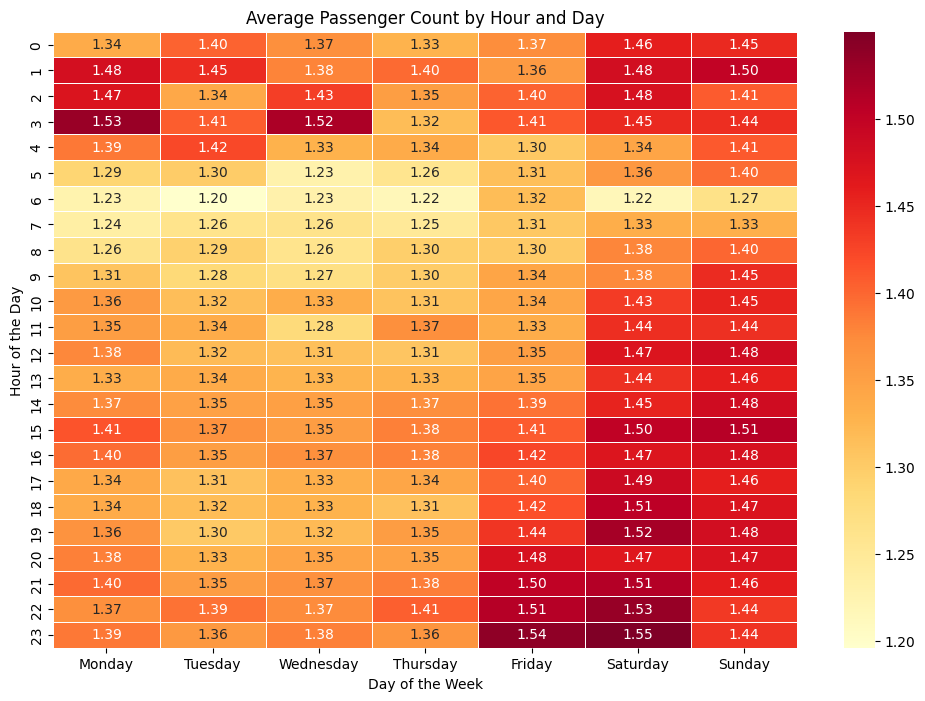

In [173]:
pivot_table = df_cleaned.pivot_table(
    index='pickup_hour',  # Rows: Hours of the day
    columns='pickup_day',  # Columns: Days of the week
    values='passenger_count',  # Values: Average passenger count
    aggfunc='mean',  # Calculate the mean
    fill_value=0  # Fill missing values with 0
)

# Reorder columns to match days of the week
pivot_table = pivot_table[day_order]

# Step 3: Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, cmap='YlOrRd', annot=True, fmt='.2f', linewidths=0.5)
plt.title('Average Passenger Count by Hour and Day')
plt.xlabel('Day of the Week')
plt.ylabel('Hour of the Day')
plt.show()

**3.2.15** <font color = red>[2 marks]</font> <br>
Analyse the variation of passenger counts across zones

In [174]:
# How does passenger count vary across zones

passenger_by_zone = df_cleaned.groupby('PULocationID')['passenger_count'].mean()
print(passenger_by_zone.sort_values().head())
print(passenger_by_zone.sort_values(ascending=False).head())

PULocationID
3     1.0
5     1.0
9     1.0
11    1.0
15    1.0
Name: passenger_count, dtype: float64
PULocationID
1      2.0
6      2.0
120    2.0
228    2.0
253    2.0
Name: passenger_count, dtype: float64


<Figure size 1200x800 with 0 Axes>

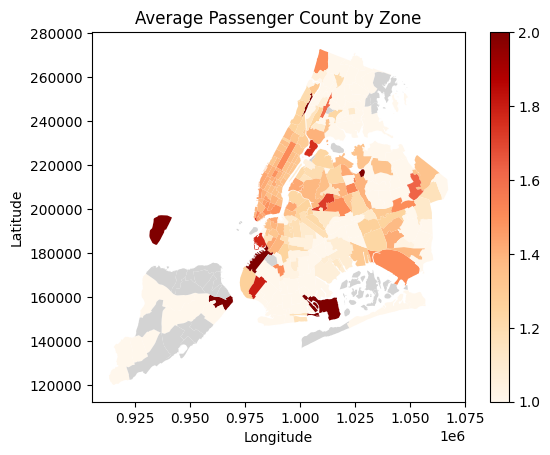

In [175]:
# For a more detailed analysis, we can use the zones_with_trips GeoDataFrame
# Create a new column for the average passenger count in each zone.
avg_passenger_by_zone = df_cleaned.groupby('PULocationID')['passenger_count'].mean().reset_index()
avg_passenger_by_zone.columns = ['LocationID', 'avg_passenger_count']

# Step 2: Merge the average passenger count with the zones data
zones_with_trips = zones.merge(avg_passenger_by_zone, left_on='LocationID', right_on='LocationID', how='left')

# Step 3: Visualize the average passenger count across zones
plt.figure(figsize=(12, 8))
zones_with_trips.plot(column='avg_passenger_count', legend=True, cmap='OrRd', missing_kwds={'color': 'lightgrey'})
plt.title('Average Passenger Count by Zone')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()



Find out how often surcharges/extra charges are applied to understand their prevalance

**3.2.16** <font color = red>[5 marks]</font> <br>
Analyse the pickup/dropoff zones or times when extra charges are applied more frequently

<Figure size 1200x800 with 0 Axes>

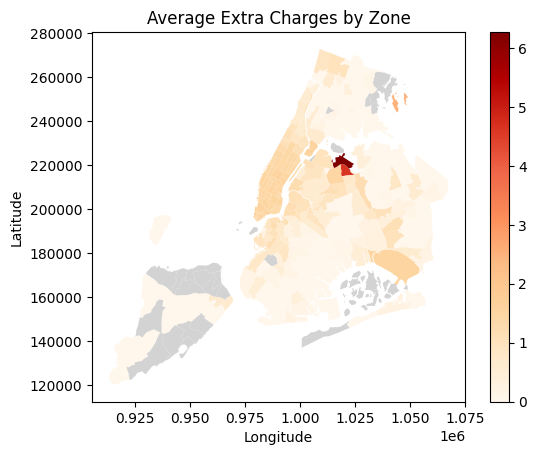

In [176]:
# How often is each surcharge applied?

extra_charges_by_zone = df_cleaned.groupby('PULocationID')['extra'].mean().reset_index()
extra_charges_by_zone.columns = ['LocationID', 'avg_extra_charges']

# Step 2: Merge the extra charges data with the zones data
zones_with_extra = zones.merge(extra_charges_by_zone, left_on='LocationID', right_on='LocationID', how='left')

# Step 3: Visualize the average extra charges across zones
plt.figure(figsize=(12, 8))
zones_with_extra.plot(column='avg_extra_charges', legend=True, cmap='OrRd', missing_kwds={'color': 'lightgrey'})
plt.title('Average Extra Charges by Zone')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()



## **4** Conclusion
<font color = red>[15 marks]</font> <br>

### **4.1** Final Insights and Recommendations
<font color = red>[15 marks]</font> <br>

Conclude your analyses here. Include all the outcomes you found based on the analysis.

Based on the insights, frame a concluding story explaining suitable parameters such as location, time of the day, day of the week etc. to be kept in mind while devising a strategy to meet customer demand and optimise supply.

##### Operational Efficiency

Analyze variations by time of day and location to identify bottlenecks or inefficiencies in routes

**4.1.1** <font color = red>[5 marks]</font> <br>
Recommendations to optimize routing and dispatching based on demand patterns and operational inefficiencies

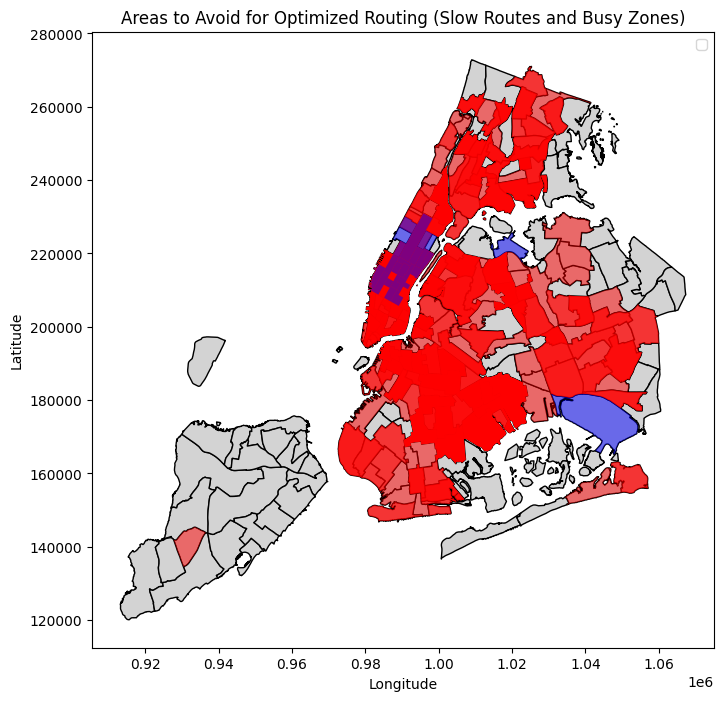

In [177]:
slow_routes = df_cleaned.groupby(['PULocationID', 'DOLocationID'])['speed'].mean().reset_index()

# Identify the slowest routes (e.g., bottom 10%)
slow_routes = slow_routes[slow_routes['speed'] < slow_routes['speed'].quantile(0.1)]

# Identify busy hours

# Define peak hours (e.g., 7 AM to 10 AM and 5 PM to 8 PM)
peak_hours = list(range(10, 22)) 
# Filter trips during peak hours
peak_trips = df_cleaned[df_cleaned['pickup_hour'].isin(peak_hours)]

# Group by pickup zone and count trips
busy_zones = peak_trips['PULocationID'].value_counts().reset_index()
busy_zones.columns = ['LocationID', 'trip_count']

# Identify the busiest zones (e.g., top 10%)
busy_zones = busy_zones[busy_zones['trip_count'] > busy_zones['trip_count'].quantile(0.9)]

# Merge slow routes and busy zones with the zones data
# Merge slow routes (using PULocationID as the zone)
slow_zones = zones.merge(slow_routes, left_on='LocationID', right_on='PULocationID', how='inner')

# Merge busy zones
busy_zones_map = zones.merge(busy_zones, left_on='LocationID', right_on='LocationID', how='inner')

# Step 4: Visualize on a map
fig, ax = plt.subplots(figsize=(12, 8))

# Plot all zones
zones.plot(ax=ax, color='lightgrey', edgecolor='black')

# Highlight slow routes (zones)
slow_zones.plot(ax=ax, color='red', alpha=0.5, label='Slow Routes')

# Highlight busy zones
busy_zones_map.plot(ax=ax, color='blue', alpha=0.5, label='Busy Zones')

# Add legend and title
plt.legend()
plt.title('Areas to Avoid for Optimized Routing (Slow Routes and Busy Zones)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

**4.1.2** <font color = red>[5 marks]</font> <br>

Suggestions on strategically positioning cabs across different zones to make best use of insights uncovered by analysing trip trends across time, days and months.

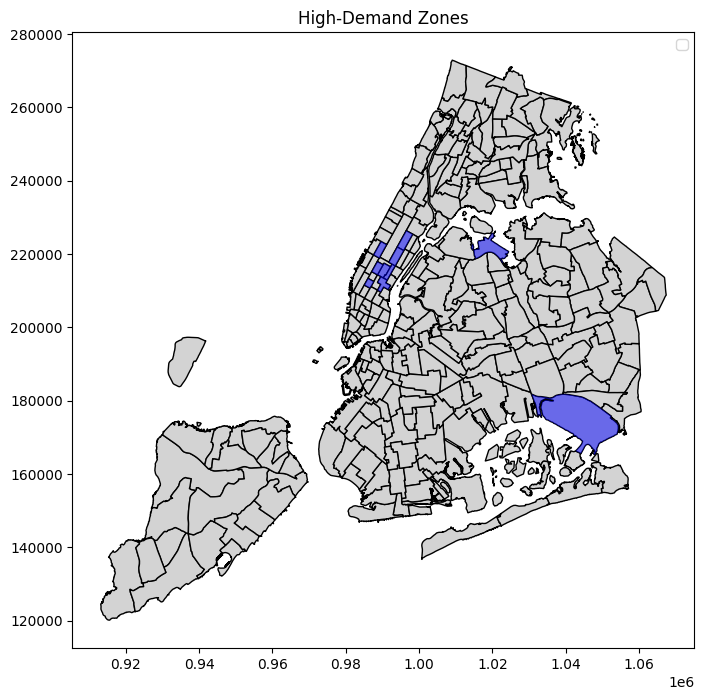

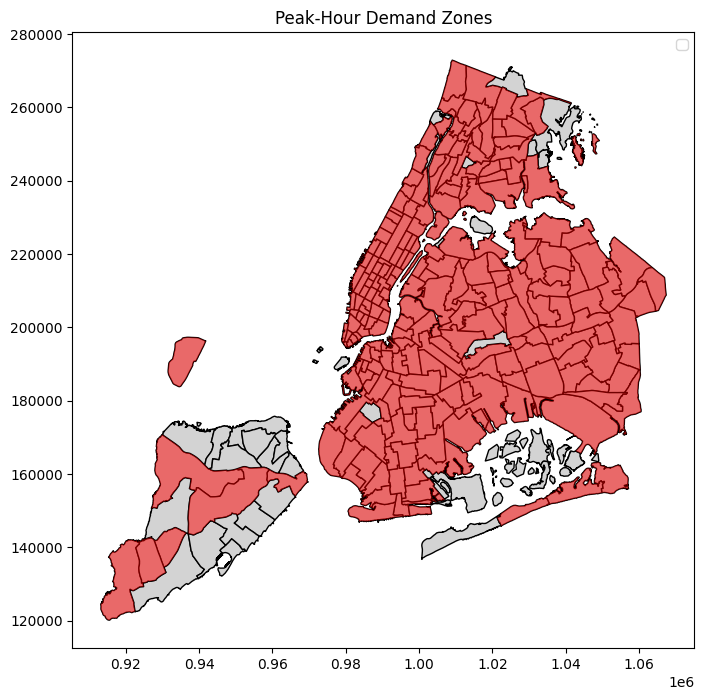

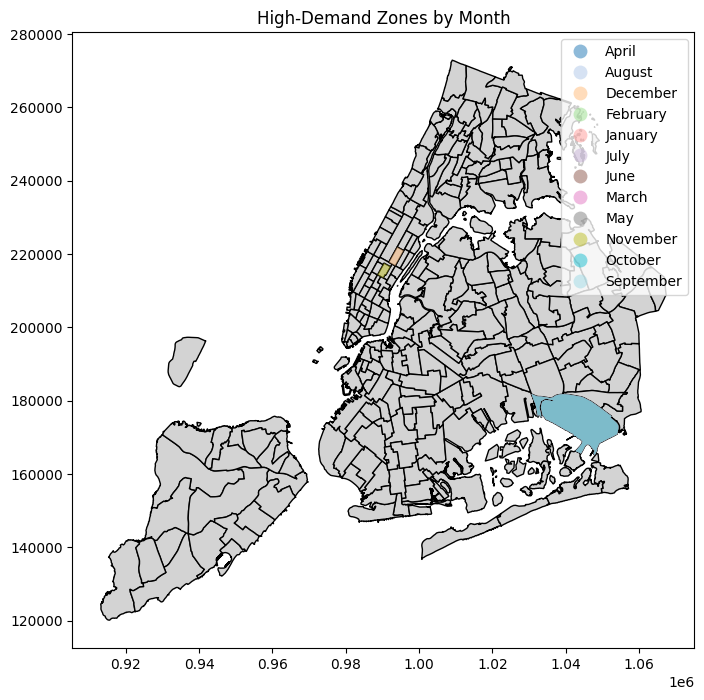

In [178]:
df_cleaned['pickup_month'] = df_cleaned['tpep_pickup_datetime'].dt.month_name()

# Identify high-demand zones
high_demand_zones = df_cleaned['PULocationID'].value_counts().head(10).reset_index()
high_demand_zones.columns = ['LocationID', 'trip_count']

# Merge with zones data
high_demand_zones_map = zones.merge(high_demand_zones, left_on='LocationID', right_on='LocationID', how='inner')

# Step 2: Analyze demand by time of day (peak hours)
peak_hours = list(range(10, 22))  
peak_trips = df[df['pickup_hour'].isin(peak_hours)]

# Group by pickup zone and count trips during peak hours
peak_demand_zones = peak_trips['PULocationID'].value_counts().reset_index()
peak_demand_zones.columns = ['LocationID', 'peak_trip_count']

# Merge with zones data
peak_demand_zones_map = zones.merge(peak_demand_zones, left_on='LocationID', right_on='LocationID', how='inner')

# Step 3: Analyze demand by month
monthly_demand = df.groupby(['pickup_month', 'PULocationID']).size().reset_index(name='trip_count')

# Identify high-demand zones for each month
high_demand_zones_by_month = monthly_demand.loc[monthly_demand.groupby('pickup_month')['trip_count'].idxmax()]

# Merge with zones data
high_demand_zones_by_month_map = zones.merge(high_demand_zones_by_month, left_on='LocationID', right_on='PULocationID', how='inner')

# Step 4: Visualize the results
# Plot high-demand zones
fig, ax = plt.subplots(figsize=(12, 8))
zones.plot(ax=ax, color='lightgrey', edgecolor='black')
high_demand_zones_map.plot(ax=ax, color='blue', alpha=0.5, label='High-Demand Zones')
plt.title('High-Demand Zones')
plt.legend()
plt.show()

# Plot peak-hour demand zones
fig, ax = plt.subplots(figsize=(12, 8))
zones.plot(ax=ax, color='lightgrey', edgecolor='black')
peak_demand_zones_map.plot(ax=ax, color='red', alpha=0.5, label='Peak-Hour Demand Zones')
plt.title('Peak-Hour Demand Zones')
plt.legend()
plt.show()

# Plot high-demand zones by month
fig, ax = plt.subplots(figsize=(12, 8))
zones.plot(ax=ax, color='lightgrey', edgecolor='black')
high_demand_zones_by_month_map.plot(ax=ax, column='pickup_month', legend=True, cmap='tab20', alpha=0.5)
plt.title('High-Demand Zones by Month')
plt.show()

**4.1.3** <font color = red>[5 marks]</font> <br>
Propose data-driven adjustments to the pricing strategy to maximize revenue while maintaining competitive rates with other vendors.

Average Fare per Mile by Distance Tier:
  distance_tier  fare_per_mile
0     0-2 miles      15.558469
1     2-5 miles       6.502276
2      5+ miles       4.481891

Average Fare per Mile by Hour of the Day:
    pickup_hour  fare_per_mile
0             0      11.615445
1             1      14.545308
2             2       8.797200
3             3       9.801487
4             4      18.671254
5             5      11.790490
6             6      12.609890
7             7       8.502808
8             8       9.672973
9             9       9.815616
10           10      10.349524
11           11      10.759231
12           12      11.801775
13           13      12.280112
14           14      12.056407
15           15      11.054626
16           16      13.622629
17           17      12.384362
18           18      10.590793
19           19      11.475310
20           20       9.484713
21           21       9.188335
22           22      12.044256
23           23      10.405132

Average Fare per 

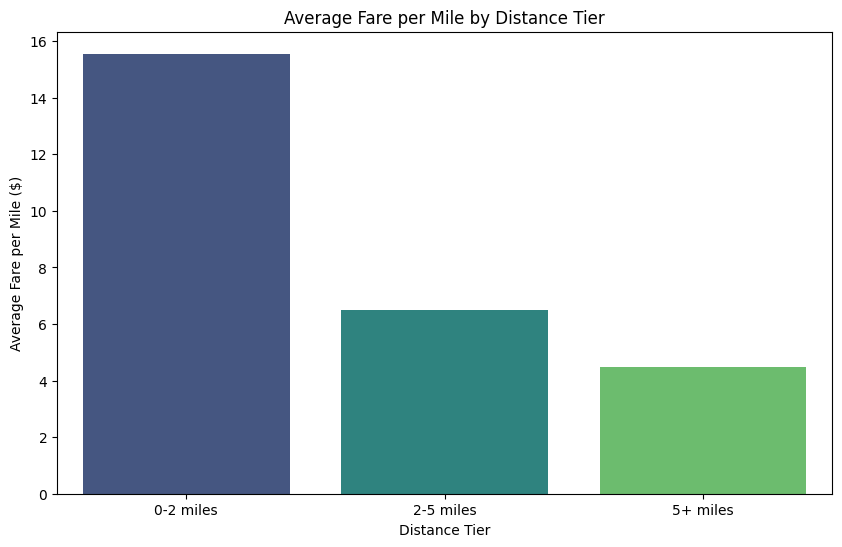

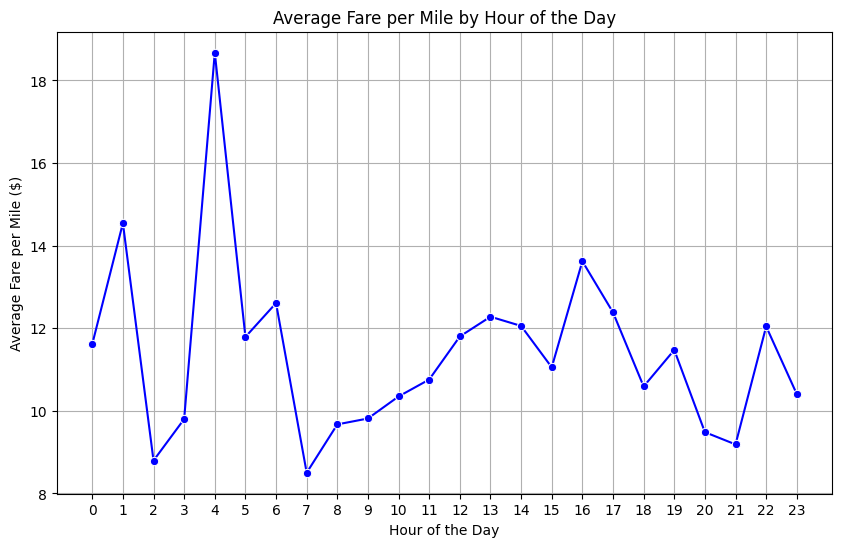

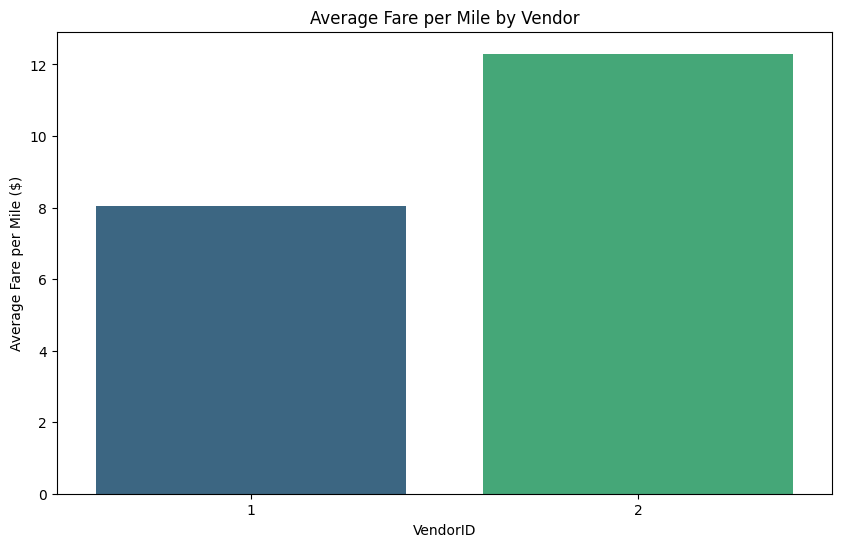

In [179]:
# Step 3: Analyze pricing by distance tier
pricing_by_distance = df_cleaned.groupby('distance_tier')['fare_per_mile'].mean().reset_index()
print("Average Fare per Mile by Distance Tier:")
print(pricing_by_distance)

# Step 4: Analyze pricing by time of day
df_cleaned['pickup_hour'] = pd.to_datetime(df_cleaned['tpep_pickup_datetime']).dt.hour
pricing_by_hour = df_cleaned.groupby('pickup_hour')['fare_per_mile'].mean().reset_index()
print("\nAverage Fare per Mile by Hour of the Day:")
print(pricing_by_hour)

# Step 5: Analyze vendor performance
pricing_by_vendor = df_cleaned.groupby('VendorID')['fare_per_mile'].mean().reset_index()
print("\nAverage Fare per Mile by Vendor:")
print(pricing_by_vendor)

# Step 6: Visualize the results
# Plot pricing by distance tier
plt.figure(figsize=(10, 6))
sns.barplot(x='distance_tier', y='fare_per_mile', data=pricing_by_distance, palette='viridis')
plt.title('Average Fare per Mile by Distance Tier')
plt.xlabel('Distance Tier')
plt.ylabel('Average Fare per Mile ($)')
plt.show()

# Plot pricing by hour of the day
plt.figure(figsize=(10, 6))
sns.lineplot(x='pickup_hour', y='fare_per_mile', data=pricing_by_hour, marker='o', color='blue')
plt.title('Average Fare per Mile by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Fare per Mile ($)')
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()

# Plot pricing by vendor
plt.figure(figsize=(10, 6))
sns.barplot(x='VendorID', y='fare_per_mile', data=pricing_by_vendor, palette='viridis')
plt.title('Average Fare per Mile by Vendor')
plt.xlabel('VendorID')
plt.ylabel('Average Fare per Mile ($)')
plt.show()


Pricing Strategy
1. Distance-Based Pricing
Short Trips (0-2 miles):

Charge a premium rate due to higher operational costs per mile for short trips.

Example: $15.50 per mile.

Medium Trips (2-5 miles):

Charge a moderate rate to balance affordability and profitability.

Example: $6.50 per mile.

Long Trips (5+ miles):

Charge a discounted rate to encourage longer trips and maximize vehicle utilization.

Example: $4.50 per mile.

2. Time-Based Pricing
Peak Hours (High Demand):

Apply a surge pricing model during peak hours (e.g., 4 AM, 1 AM, 4 PM).

Example: Increase fare per mile by 10-20% during peak hours.

Off-Peak Hours (Low Demand):

Offer discounted rates during off-peak hours to attract more customers.

Example: Reduce fare per mile by 5-10% during off-peak hours.

3. Vendor-Based Pricing
Vendor 1:

Maintain competitive pricing to attract cost-sensitive customers.

Example: Keep fare per mile at $8.00.

Vendor 2:

Charge a premium rate due to better performance or higher service quality.

Example: Keep fare per mile at $12.30.

